In [79]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import wrangle

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Questions:
> * 1. Which lesson appears to attract the most traffic consistently across cohorts (per program)?
> * 2. Is there a cohort that referred to a lesson significantly more than other cohorts seemed to gloss over?
> * 3. Are there students who, when active, hardly access the curriculum? If so, what information do you have about these students?
> * 4. Is there any suspicious activity, such as users/machines/etc accessing the curriculum who shouldn’t be? Does it appear that any web-scraping is happening? Are there any suspicious IP addresses?
> * 5. At some point in 2019, the ability for students and alumni to access both curriculums (web dev to ds, ds to web dev) should have been shut off. Do you see any evidence of that happening? Did it happen before?
> * 6. What topics are grads continuing to reference after graduation and into their jobs (for each program)?
> * 7. Which lessons are least accessed?
> * 8. Anything else I should be aware of?


In [2]:
cohorts = pd.read_csv('cohorts_data.csv')
logs = pd.read_csv('logs_data.csv')

for col in cohorts.columns:
    if 'Unnamed' in col:
        cohorts = cohorts.drop(columns=[col])

for col in logs.columns:
    if 'Unnamed' in col:
        logs = logs.drop(columns=[col])

cohorts.head()

,id,name,slack,start_date,end_date,created_at,updated_at,deleted_at,program_id
0,1,Arches,#arches,2014-02-04,2014-04-22,2016-06-14 19:52:26,2016-06-14 19:52:26,NaN,1
1,2,Badlands,#badlands,2014-06-04,2014-08-22,2016-06-14 19:52:26,2016-06-14 19:52:26,NaN,1
2,3,Carlsbad,#carlsbad,2014-09-04,2014-11-05,2016-06-14 19:52:26,2016-06-14 19:52:26,NaN,1
3,4,Denali,#denali,2014-10-20,2015-01-18,2016-06-14 19:52:26,2016-06-14 19:52:26,NaN,1
4,5,Everglades,#everglades,2014-11-18,2015-02-24,2016-06-14 19:52:26,2016-06-14 19:52:26,NaN,1


In [3]:
cohorts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          53 non-null     int64  
 1   name        53 non-null     object 
 2   slack       53 non-null     object 
 3   start_date  53 non-null     object 
 4   end_date    53 non-null     object 
 5   created_at  53 non-null     object 
 6   updated_at  53 non-null     object 
 7   deleted_at  0 non-null      float64
 8   program_id  53 non-null     int64  
dtypes: float64(1), int64(2), object(6)
memory usage: 3.9+ KB


In [4]:
cohorts= cohorts.drop(columns=['deleted_at'])
cohorts.head(3)

,id,name,slack,start_date,end_date,created_at,updated_at,program_id
0,1,Arches,#arches,2014-02-04,2014-04-22,2016-06-14 19:52:26,2016-06-14 19:52:26,1
1,2,Badlands,#badlands,2014-06-04,2014-08-22,2016-06-14 19:52:26,2016-06-14 19:52:26,1
2,3,Carlsbad,#carlsbad,2014-09-04,2014-11-05,2016-06-14 19:52:26,2016-06-14 19:52:26,1


In [5]:
cohorts.tail(4)

,id,name,slack,start_date,end_date,created_at,updated_at,program_id
49,136,Placeholder for students in transition,#null,2021-03-03,2029-03-01,2021-03-03 21:50:49,2021-03-03 21:52:56,2
50,137,Florence,#florence,2021-03-15,2021-09-03,2021-03-15 18:18:20,2021-03-15 18:18:20,3
51,138,Neptune,#neptune,2021-03-15,2021-09-03,2021-03-15 19:57:09,2021-03-15 19:57:09,2
52,139,Oberon,#oberon,2021-04-12,2021-10-01,2021-04-12 18:07:21,2021-04-12 18:07:21,2


In [6]:
logs.head()

,date,time,path,user_id,cohort_id,ip
0,2018-01-26,09:55:03,/,1,8.0,97.105.19.61
1,2018-01-26,09:56:02,java-ii,1,8.0,97.105.19.61
2,2018-01-26,09:56:05,java-ii/object-oriented-programming,1,8.0,97.105.19.61
3,2018-01-26,09:56:06,slides/object_oriented_programming,1,8.0,97.105.19.61
4,2018-01-26,09:56:24,javascript-i/conditionals,2,22.0,97.105.19.61


In [7]:
logs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900223 entries, 0 to 900222
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   date       900223 non-null  object 
 1   time       900223 non-null  object 
 2   path       900222 non-null  object 
 3   user_id    900223 non-null  int64  
 4   cohort_id  847330 non-null  float64
 5   ip         900223 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 41.2+ MB


In [8]:
logs.cohort_id.value_counts(dropna=False)

28.0     84031
NaN      52893
33.0     40730
29.0     38096
62.0     37109
53.0     36902
24.0     35636
57.0     33844
56.0     33568
51.0     32888
59.0     32015
22.0     30926
58.0     29855
32.0     29356
23.0     28534
52.0     28033
26.0     27749
34.0     26538
25.0     25586
31.0     25359
132.0    23691
55.0     21582
27.0     20743
61.0     17713
134.0    16623
135.0    16397
133.0    14715
14.0      9587
1.0       8890
137.0     8562
21.0      7444
138.0     7276
17.0      4954
13.0      2845
18.0      2158
8.0       1712
139.0     1672
19.0      1237
16.0       755
15.0       691
7.0        598
12.0       302
11.0       253
2.0         93
6.0         72
9.0          5
4.0          4
5.0          1
Name: cohort_id, dtype: int64

In [9]:
logs = logs.fillna(0)

In [10]:
df = pd.merge(left_on=logs.cohort_id, right_on=cohorts.id, left=logs, right=cohorts,how='outer').drop(columns='key_0')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 900229 entries, 0 to 900228
Data columns (total 14 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   date        900223 non-null  object 
 1   time        900223 non-null  object 
 2   path        900223 non-null  object 
 3   user_id     900223 non-null  float64
 4   cohort_id   900223 non-null  float64
 5   ip          900223 non-null  object 
 6   id          847336 non-null  float64
 7   name        847336 non-null  object 
 8   slack       847336 non-null  object 
 9   start_date  847336 non-null  object 
 10  end_date    847336 non-null  object 
 11  created_at  847336 non-null  object 
 12  updated_at  847336 non-null  object 
 13  program_id  847336 non-null  float64
dtypes: float64(4), object(10)
memory usage: 103.0+ MB


In [12]:
df.head()

,date,time,path,user_id,cohort_id,ip,id,name,slack,start_date,end_date,created_at,updated_at,program_id
0,2018-01-26,09:55:03,/,1.0,8.0,97.105.19.61,8.0,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,1.0
1,2018-01-26,09:56:02,java-ii,1.0,8.0,97.105.19.61,8.0,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,1.0
2,2018-01-26,09:56:05,java-ii/object-oriented-programming,1.0,8.0,97.105.19.61,8.0,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,1.0
3,2018-01-26,09:56:06,slides/object_oriented_programming,1.0,8.0,97.105.19.61,8.0,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,1.0
4,2018-01-26,10:40:15,javascript-i/functions,1.0,8.0,97.105.19.61,8.0,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,1.0


### 7. Which lessons are least accessed?

> * General start and end of entire site
> * General start and end for each module/lesson
> * See if things haven't been accessed in a long time

MVP: 
Lessons


**NOTE:** At some point in 2019, the ability for students and alumni to access both curriculums (web dev to ds, ds to web dev) should have been shut off. Do you see any evidence of that happening? Did it happen before?

In [13]:
#Range of Dates for entire site:
df.date = pd.to_datetime(df.date+" " +df.time)
df[df.date.isnull()].shape[0]

6

> **note:** Only 6 datetime values that are non-functional

In [15]:
# name of the cohorts/placeholders with inaccurate date values
df.name[df.date.isnull()]

900223                                  Carlsbad
900224                                    Balboa
900225                                   Redwood
900226                                       Ada
900227                                        Io
900228    Placeholder for students in transition
Name: name, dtype: object

In [16]:
# confirming the number of occurrences of the above cohorts/ph
df.name.value_counts().tail(10)

Franklin                                  72
Apollo                                     5
Denali                                     4
Redwood                                    1
Io                                         1
Ada                                        1
Everglades                                 1
Balboa                                     1
Carlsbad                                   1
Placeholder for students in transition     1
Name: name, dtype: int64

In [17]:
df.date.min(), df.date.max()

(Timestamp('2018-01-26 09:55:03'), Timestamp('2021-04-21 16:44:39'))

**Conclusion**: Our data started on Jan 26th, 2018 and is current up to April 21, 2021

## Analyzing low traffic by program
> * program 1: web dev
> * program 2: web dev
> * program 3: data science

In [ ]:
new = df.path.value_counts().to_frame()
sub = pd.merge(left=df, right = new, left_on=df.path, right_on=new.index)
sub = sub[sub.path_y == 1]

In [141]:
sub.head()

,date,time,path_x,user_id,cohort_id,ip,name,slack,start_date,end_date,created_at,updated_at,program_id,path_y
89882,2018-01-27 07:49:25,07:49:25,teams/13,1.0,8.0,72.177.226.58,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,1.0,1
126074,2018-01-30 11:41:30,11:41:30,asdf,1.0,8.0,97.105.19.61,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,1.0,1
352634,2018-03-01 21:07:05,21:07:05,prework/cli/07-editing-files-with-vim,114.0,8.0,173.173.119.75,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,1.0,1
400387,2018-03-11 14:39:16,14:39:16,java-ii/file-op,1.0,8.0,72.177.226.58,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,1.0,1
428068,2018-03-21 09:37:43,09:37:43,slides/exceptions,1.0,8.0,97.105.19.61,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,1.0,1


In [133]:
# all programs + NaN
sub.program_id.value_counts(dropna=False)

2.0    285
3.0     68
1.0     60
NaN     45
Name: program_id, dtype: int64

### Program 1

In [136]:
sub.date[sub.program_id==1].min(), sub.date[sub.program_id==1].max()

(Timestamp('2018-01-27 07:49:25'), Timestamp('2021-03-05 11:16:56'))

In [126]:
# program 1
sub.date.dt.year[sub.program_id == 1].value_counts()

2018    31
2020    15
2019     8
2021     6
Name: date, dtype: int64

### Program 2

In [137]:
sub.date[sub.program_id==2].min(), sub.date[sub.program_id==2].max()

(Timestamp('2018-01-26 13:39:02'), Timestamp('2021-04-15 16:28:50'))

In [130]:
# program 2
sub.date.dt.year[sub.program_id == 2].value_counts()

2019    134
2020     92
2021     32
2018     27
Name: date, dtype: int64

### Program 3 

In [138]:
sub.date[sub.program_id==3].min(), sub.date[sub.program_id==3].max()

(Timestamp('2019-08-30 12:08:28'), Timestamp('2021-04-11 09:17:02'))

In [128]:
# program 3
sub.date.dt.year[sub.program_id == 3].value_counts()

2020    28
2021    24
2019    16
Name: date, dtype: int64

### NaN

In [139]:
sub.date[sub.program_id.isna()].min(), sub.date[sub.program_id.isna()].max()

(Timestamp('2019-03-04 09:25:59'), Timestamp('2020-10-22 16:10:08'))

In [129]:
sub.date.dt.year[sub.program_id == 1].value_counts().sum() + sub.date.dt.year[sub.program_id == 2].value_counts().sum() + sub.date.dt.year[sub.program_id == 3].value_counts().sum()

413

# Analyzing low traffic by cohort

**Why less than 2021?** Because 2021 would include current/ongoing cohorts and it would make sense for some pages to have low traffic from those cohorts

In [151]:
cohort_sub = sub.name.value_counts(dropna=False).to_frame()
cohort_sub['first_date_access'] = sub.groupby('name').date.min()
cohort_sub['last_date_access'] = sub.groupby('name').date.max()
cohort_sub[(cohort_sub.first_date_access.dt.year < 2021) & (cohort_sub.last_date_access.dt.year >= 2021)].rename(columns={'name':'count'})


,count,first_date_access,last_date_access
Staff,111,2019-01-11 11:51:19,2021-04-15 16:28:50
Bayes,28,2019-08-30 12:08:28,2021-03-01 11:16:33
Lassen,15,2018-02-07 13:48:51,2021-03-05 11:16:56
Kings,11,2018-07-09 19:40:52,2021-02-13 05:12:44
Yosemite,11,2018-12-04 10:44:56,2021-03-04 09:33:32
Jupiter,10,2020-10-17 23:11:31,2021-04-06 18:56:06
Bash,9,2020-07-24 16:41:07,2021-01-07 13:54:04
Teddy,9,2018-03-28 15:38:59,2021-03-12 10:00:27
Kalypso,8,2020-11-03 10:12:58,2021-03-11 09:09:49
Luna,6,2020-12-10 10:08:01,2021-02-25 21:32:35


In [155]:
df[df.name=='Staff'].date.min()

Timestamp('2018-01-26 09:55:03')

In [95]:
num_paths = df.path.nunique()
num_paths

2314

In [20]:
bottom_400 = np.unique(df.path.value_counts().iloc[num_paths-400:,].values)
bottom_400

array([1])

In [96]:
accessed_once = df.path.unique()[1:][df.path.value_counts() == 1]
once = pd.Series(accessed_once[:-1])
        
mask = []
added_True = False
for path in df.path.values:
    
    added_True = False
    for uno in once.values:
        if uno == path:
            mask.append(True)
            added_True = True
        if added_True:
            break
    if not added_True:
        mask.append(False)
            
            
df[mask]


,date,time,path,user_id,cohort_id,ip,id,name,slack,start_date,end_date,created_at,updated_at,program_id,accessed_once
311830,2020-08-05 00:52:40,00:52:40,storytelling/creating-custom-fields,11.0,28.0,76.185.145.231,28.0,Staff,#,2014-02-04,2014-02-04,2018-12-06 17:04:19,2018-12-06 17:04:19,2.0,True
311831,2020-08-05 00:52:41,00:52:41,storytelling/creating-dashboards,11.0,28.0,76.185.145.231,28.0,Staff,#,2014-02-04,2014-02-04,2018-12-06 17:04:19,2018-12-06 17:04:19,2.0,True
311832,2020-08-05 00:52:42,00:52:42,storytelling/creating-stories,11.0,28.0,76.185.145.231,28.0,Staff,#,2014-02-04,2014-02-04,2018-12-06 17:04:19,2018-12-06 17:04:19,2.0,True
311929,2020-08-05 11:06:05,11:06:05,slides/form,428.0,28.0,70.121.183.95,28.0,Staff,#,2014-02-04,2014-02-04,2018-12-06 17:04:19,2018-12-06 17:04:19,2.0,True
311930,2020-08-05 11:06:09,11:06:09,slides/formmodelbinding,428.0,28.0,70.121.183.95,28.0,Staff,#,2014-02-04,2014-02-04,2018-12-06 17:04:19,2018-12-06 17:04:19,2.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
898312,2021-04-20 10:35:18,10:35:18,dataframes,895.0,137.0,96.8.253.119,137.0,Florence,#florence,2021-03-15,2021-09-03,2021-03-15 18:18:20,2021-03-15 18:18:20,3.0,True
898313,2021-04-20 10:35:22,10:35:22,dataframes,895.0,137.0,96.8.253.119,137.0,Florence,#florence,2021-03-15,2021-09-03,2021-03-15 18:18:20,2021-03-15 18:18:20,3.0,True
898314,2021-04-20 10:36:05,10:36:05,dataframes,895.0,137.0,96.8.253.119,137.0,Florence,#florence,2021-03-15,2021-09-03,2021-03-15 18:18:20,2021-03-15 18:18:20,3.0,True
898321,2021-04-20 10:37:37,10:37:37,dataframes,895.0,137.0,96.8.253.119,137.0,Florence,#florence,2021-03-15,2021-09-03,2021-03-15 18:18:20,2021-03-15 18:18:20,3.0,True


In [98]:
df[mask].path.value_counts()

stats/hypothesis-testing-overview     420
fundamentals/spreadsheets-overview    370
classification/knn                    348
classification/random-forests         345
stats/overview                        312
                                     ... 
mysql/java-iii                          1
slides/css                              1
sgithubtudents/1215                     1
examples/html/welcome                   1
where                                   1
Name: path, Length: 457, dtype: int64

In [83]:
once.values

array(['storytelling/creating-custom-fields',
       'storytelling/creating-dashboards',
       'storytelling/creating-stories', 'slides/form',
       'slides/formmodelbinding', 'slides/jpa', 'sw-project-planning',
       'repo-doc', 'storytelling/bad-charts',
       'storytelling/misleading1_baseball.jpg',
       'storytelling/misleading1_fox.jpg',
       'storytelling/misleading3_deaths.jpg',
       'javascript-i/introduction/working-with-data-types-operators-and-variables/600%20Navarro%20St.,%20San%20Antonio,%20TX%2078205,%20United%20States%20of%20America',
       'javascript-i/introduction/working-with-data-types-operators-and-variables/google.com',
       'series', 'dataframes', 'pandas-overview',
       'nlp/regular-expressions',
       'professional-development/t-block-resume',
       'appendix/further-reading/html-css',
       'fundamentals/spreadsheets-overview',
       'fundamentals/visualization-with-excel', 'storytelling/tableau',
       'storytelling/refine', 'storytelling

In [79]:
df.accessed_once.sum()

8204

In [81]:
df[df.accessed_once == True].path.value_counts()

stats/hypothesis-testing-overview     420
fundamentals/spreadsheets-overview    370
classification/knn                    348
classification/random-forests         345
stats/overview                        312
                                     ... 
mysql/java-iii                          1
slides/css                              1
sgithubtudents/1215                     1
examples/html/welcome                   1
where                                   1
Name: path, Length: 457, dtype: int64

# CONCLUSION:

In [142]:
word_counts = {}


for path in df.path.value_counts().index:
    word = str(path)
    for elem in word.split('/'):
        if len(elem) > 0 and elem not in list(word_counts.keys()):
            word_counts[elem] = 1
        elif len(elem) > 0:
            word_counts[elem] += 1
            
word_count = pd.Series(word_counts, name='word_count').sort_values(ascending=False)
word_count

content                        337
appendix                       222
html-css                        77
mysql                           77
examples                        77
                              ... 
13.3_Refine                      1
bootstrap-introduction.html      1
styling-webpages                 1
9.20_Data                        1
2-sql                            1
Name: word_count, Length: 1614, dtype: int64

In [128]:
df.path.head()

0                                      /
1                                java-ii
2    java-ii/object-oriented-programming
3     slides/object_oriented_programming
4                 javascript-i/functions
Name: path, dtype: object

In [69]:
first_word = [str(path).split('/')[0] for path in df.path.value_counts().index]
second_word = [str(path).split('/')[1] for path in df.path.value_counts().index if len(str(path).split('/'))>1]
third_word = [str(path).split('/')[2] for path in df.path.value_counts().index if len(str(path).split('/'))>2]
fourth_word = [str(path).split('/')[3] for path in df.path.value_counts().index if len(str(path).split('/'))>3]
fifth_word = [str(path).split('/')[4] for path in df.path.value_counts().index if len(str(path).split('/'))>4]
sixth_word = [str(path).split('/')[5] for path in df.path.value_counts().index if len(str(path).split('/'))>5]
seventh_word = [str(path).split('/')[6] for path in df.path.value_counts().index if len(str(path).split('/'))>6]

word_list = [first_word, second_word, third_word, fourth_word, fifth_word, sixth_word, seventh_word]

def flatten(a_list):
    return [word for words in word_list for word in words]

separators = ['.', '-', '_']


exercise = ['exercise', 'Exercise', 'challenge', 'practice', 'Challenge', 'Practice',
            'problem', 'Problem', 'question', 'Question']

programming = ['sql', 'python', 'java', 'Java', 'Python', 'SQL', 'Sql', 'ruby', 'Ruby', 'c++', 'C++',
              'programming', 'Programming', 'functions', 'Functions', 'import', 'Import', 'git', 'Git', 'terminal',
              'jupyter', 'Jupyter', 'pandas', 'Pandas', 'acquire', 'prepare']

math = ['stat', 'Stat', 'proba', 'Proba']

math_count = 0
exercise_count = 0
programming_count = 0

flattened = set(flatten(word_list))

for ex in exercise:
    for word in flattened:
        if ex in word:
            exercise_count+=1
            
for mth in math:
    for word in flattened:
        if mth in word:
            math_count +=1
            
for pro in programming:
    for word in flattened:
        if pro in word:
            programming_count+=1
            
print(f'exercise count: {exercise_count}')
print(f'programming count: {programming_count}')
print(f'math count: {math_count}')
for word in flattened:
    if 'question' in word or 'Question' in word:
        print(word)
    if 'prepare' in word:
        print(word)

exercise count: 45
programming count: 123
math count: 60
mock-behavioral-question
prepared-statements
interview_questions_students
interview-questions
interview_questions
mock-behavioral-questions
prepared-statements.html
interview-questions-behavioral
6.3-prepare-part-3
6.1-prepare-part-1
4-prepare
6.2-prepare-part-2
interview-questions-students
prepare
interview_questions_instructors
interview-questions-tech
6.4-prepare-part-4


In [39]:
once

0            storytelling/creating-custom-fields
1               storytelling/creating-dashboards
2                  storytelling/creating-stories
3                                    slides/form
4                        slides/formmodelbinding
                         ...                    
452    diagram-of-ds-pipeline-fraud-example.jpeg
453                     data-science-modules.jpg
454                 ml-methodologies-drawing.jpg
455                              case-statements
456                                        where
Length: 457, dtype: object

In [156]:
resources = ['jpg', 'jpeg', 'png', 'pdf', 'slides', 'doc', 'chart', 'gif']

presentation = ['story', 'stories', 'present']
programming = ['java', 'python', 'git', 'cloud']

def search_once(once, category):
    count = 0
    paths_in_category = []
    
    for word in category:
        
        for path in once.values:
            if word in str(path).lower():
                count+= 1
                paths_in_category.append(str(path).lower())
                
    print(f'{category}: {count}')
    return paths_in_category

def subset_once(lst_of_categories, once):
    flattened = flatten(lst_of_categories)
    all_

search_once(once, resources)
search_once(once, presentation)
search_once(once, programming)


['jpg', 'jpeg', 'png', 'pdf', 'slides', 'doc', 'chart', 'gif']: 31
['story', 'stories', 'present']: 18
['java', 'python', 'git', 'cloud']: 61


['javascript-i/introduction/working-with-data-types-operators-and-variables/600%20navarro%20st.,%20san%20antonio,%20tx%2078205,%20united%20states%20of%20america',
 'javascript-i/introduction/working-with-data-types-operators-and-variables/google.com',
 'javascript-i/dom',
 'javascript-i/loops/google.com',
 'appendix/further-reading/java/intellij',
 'javascript-i/operators',
 'appendix/extra-exercises/javascript',
 'appendix/java/intellij-tomcat-configuration',
 'java-i/control-stateedabitments-and-loops',
 'java-iii/mvc.jsp',
 'mysql/java-iii',
 'appendix/further-reading/javascript',
 'javascript-i/bom-and-dom/bom/http%22://www.google.com',
 'javascript-i/bom-and-dom/bom/google.com',
 'java-1',
 'further-reading/java/intellij-tomcat-configuration',
 'javascript-i/math',
 'java-i/control-statements-and-loops/g',
 'javascript/functions',
 'javascript',
 'appendix/java',
 'javascri',
 'javascript/apendix',
 'javascript-i/primitive-types',
 'further-reading/javascript/array-splice',
 'extr

In [190]:
resources = []
endpoints = []
lessons = []
for val in once.values:
    resources.append(str(val).split('/')[0])
    endpoints.append(str(val).split('/')[1:])
    if len(str(val).split('/')) > 2:
        lessons.append(str(val).split('/')[2])

res_df = pd.Series(resources, name='resources').value_counts()
endpoint_df = pd.Series(['/'.join(end) for end in endpoints], name='endpoint')
lesson_df = pd.Series(lessons, name='lessons')
endpoint_df

0      creating-custom-fields
1         creating-dashboards
2            creating-stories
3                        form
4            formmodelbinding
                ...          
452                          
453                          
454                          
455                          
456                          
Name: endpoint, Length: 457, dtype: object

In [191]:
endpoint_df[endpoint_df.values != ''].head(20)

0                                creating-custom-fields
1                                   creating-dashboards
2                                      creating-stories
3                                                  form
4                                      formmodelbinding
5                                                   jpa
8                                            bad-charts
9                              misleading1_baseball.jpg
10                                  misleading1_fox.jpg
11                               misleading3_deaths.jpg
12    introduction/working-with-data-types-operators...
13    introduction/working-with-data-types-operators...
17                                  regular-expressions
18                                       t-block-resume
19                             further-reading/html-css
20                                spreadsheets-overview
21                             visualization-with-excel
22                                              

In [192]:
(res_df > 1).sum()

46

In [193]:
(res_df == 1).sum()

163

In [194]:
res_df.head(20)

appendix                    45
html-css                    18
javascript-i                16
storytelling                13
fundamentals                13
regression                  12
mysql                       10
python                      10
examples                    10
classification              10
nlp                          9
clustering                   8
timeseries                   7
stats                        7
jquery                       6
slides                       6
extra-challenges             6
distributed-ml               6
cli                          5
professional-development     5
Name: resources, dtype: int64

In [195]:
data_science = ['slides', 'storytelling', 'fundamentals', 'regression', 'mysql', 'python', 'classification', 'examples', 'professional-development', 'nlp', 'clustering', 'timeseries', 'stats']
web_dev = ['examples', 'professional_development', 'jquery', 'html-css', 'appendix', 'java', 'slides']

In [199]:
lesson_df.unique()[lesson_df.value_counts() == 1]

array(['creating-files-and-directories', 'moving-files', 'more-topics',
       ':view-page', 'host-wildcards', 'interview-guidance',
       'interview-questions-tech', 'mysql', 'post-interview-review-form',
       'clauses', '..%2f', '..%5c', '..%c0%af', '..%255c',
       '%252e%252e%255c', 'google.com', 'requests-and-responses', 'notes',
       'java', 'php', 'form-model-binding', 'favicon.ico', 'javascript',
       'images', 'flexbox-fundamentals', 'css-grid-fundamentals',
       'css-grid-intro', 'layout', 'intellij-tomcat-configuration',
       '2-listing-files', '2-Overview', '2-overview', '7-more-topics',
       'null', 'navigating-the-filesystem.md', 'extra-exercises',
       'sample-database', 'database-design', 'ntellij', 'welcome', 'bom',
       'relationships', 'positioning', 'security-use-cases',
       'www.qlik.com', 'github.com', 'www.opensecrets.org',
       'www.followthemoney.org', 'www.census.gov', 'grid', '03-filepaths',
       'flexbox-additional-concepts', 'boostr

In [205]:
len(df.ip.unique())

5532

In [234]:
import requests
import os
import env


def scrape_ip_locations(df, index_num=0):
    """ needs original log df (900000 rows), index_num = n where n is which ip address index you want to start at."""
    locations = []
    i=0
    
    filename = 'ip_geographical_data.csv'
    
    if os.path.isfile(filename):
        result_df = pd.read_csv(filename)
    else:
        result_df = pd.DataFrame()
    
    # add bracket after 'ip_list' with number to add to df
    # 684
    
    ip_list = df.ip.unique()[index_num:]
    for ip in ip_list:
        url = f'http://ipinfo.io/{ip}?token={env.TOKEN}/json'
        data = requests.get(url).json()

        i+=1
        print(f'\r{i}', end='')
        try:
            IP=data['ip']
            org=data['org']
            city = data['city']
            country=data['country']
            region=data['region']
            locations.append({'ip':IP, 'org':org, 'city':city, 'country':country, 'region':region})
        except:
            IP=data['ip']
            org='none'
            city = data['city']
            country=data['country']
            region=data['region']
            locations.append({'ip':IP, 'org':org, 'city':city, 'country':country, 'region':region})

            
    result_df = pd.concat([result_df,pd.DataFrame(locations)])
    result_df = result_df.drop_duplicates()
    
    result_df.to_csv(filename, index=False)

    return result_df

new_locations = scrape_ip_locations(df, 684)

9{'ip': '45.56.172.244', 'city': 'Denver', 'region': 'Colorado', 'country': 'US', 'loc': '39.7379,-104.9850', 'postal': '80261', 'timezone': 'America/Denver', 'readme': 'https://ipinfo.io/missingauth'}
16{'ip': '45.56.172.242', 'city': 'Denver', 'region': 'Colorado', 'country': 'US', 'loc': '39.7379,-104.9850', 'postal': '80261', 'timezone': 'America/Denver', 'readme': 'https://ipinfo.io/missingauth'}
17{'ip': '45.56.172.248', 'city': 'Denver', 'region': 'Colorado', 'country': 'US', 'loc': '39.7379,-104.9850', 'postal': '80261', 'timezone': 'America/Denver', 'readme': 'https://ipinfo.io/missingauth'}
18{'ip': '45.56.172.243', 'city': 'Denver', 'region': 'Colorado', 'country': 'US', 'loc': '39.7379,-104.9850', 'postal': '80261', 'timezone': 'America/Denver', 'readme': 'https://ipinfo.io/missingauth'}
247{'ip': '45.56.160.98', 'city': 'Charlotte', 'region': 'North Carolina', 'country': 'US', 'loc': '35.2271,-80.8431', 'postal': '28281', 'timezone': 'America/New_York', 'readme': 'https://

870{'ip': '104.237.80.53', 'city': 'Beijing', 'region': 'Beijing', 'country': 'CN', 'loc': '39.9075,116.3972', 'timezone': 'Asia/Shanghai', 'readme': 'https://ipinfo.io/missingauth'}
871{'ip': '104.237.80.150', 'city': 'Beijing', 'region': 'Beijing', 'country': 'CN', 'loc': '39.9075,116.3972', 'timezone': 'Asia/Shanghai', 'readme': 'https://ipinfo.io/missingauth'}
874{'ip': '104.237.80.157', 'city': 'Beijing', 'region': 'Beijing', 'country': 'CN', 'loc': '39.9075,116.3972', 'timezone': 'Asia/Shanghai', 'readme': 'https://ipinfo.io/missingauth'}
875{'ip': '104.237.80.21', 'city': 'Beijing', 'region': 'Beijing', 'country': 'CN', 'loc': '39.9075,116.3972', 'timezone': 'Asia/Shanghai', 'readme': 'https://ipinfo.io/missingauth'}
876{'ip': '104.237.80.24', 'city': 'Beijing', 'region': 'Beijing', 'country': 'CN', 'loc': '39.9075,116.3972', 'timezone': 'Asia/Shanghai', 'readme': 'https://ipinfo.io/missingauth'}
878{'ip': '104.237.80.114', 'city': 'Beijing', 'region': 'Beijing', 'country': 'CN'

965{'status': 429, 'error': {'title': 'Rate limit exceeded', 'message': "You've hit the daily limit for the unauthenticated API.  Create an API access token by signing up to get 50k req/month."}}
966{'status': 429, 'error': {'title': 'Rate limit exceeded', 'message': "You've hit the daily limit for the unauthenticated API.  Create an API access token by signing up to get 50k req/month."}}
967{'status': 429, 'error': {'title': 'Rate limit exceeded', 'message': "You've hit the daily limit for the unauthenticated API.  Create an API access token by signing up to get 50k req/month."}}
968{'status': 429, 'error': {'title': 'Rate limit exceeded', 'message': "You've hit the daily limit for the unauthenticated API.  Create an API access token by signing up to get 50k req/month."}}
969{'status': 429, 'error': {'title': 'Rate limit exceeded', 'message': "You've hit the daily limit for the unauthenticated API.  Create an API access token by signing up to get 50k req/month."}}
970{'status': 429, '

1007{'status': 429, 'error': {'title': 'Rate limit exceeded', 'message': "You've hit the daily limit for the unauthenticated API.  Create an API access token by signing up to get 50k req/month."}}
1008{'status': 429, 'error': {'title': 'Rate limit exceeded', 'message': "You've hit the daily limit for the unauthenticated API.  Create an API access token by signing up to get 50k req/month."}}
1009{'status': 429, 'error': {'title': 'Rate limit exceeded', 'message': "You've hit the daily limit for the unauthenticated API.  Create an API access token by signing up to get 50k req/month."}}
1010{'status': 429, 'error': {'title': 'Rate limit exceeded', 'message': "You've hit the daily limit for the unauthenticated API.  Create an API access token by signing up to get 50k req/month."}}
1011{'status': 429, 'error': {'title': 'Rate limit exceeded', 'message': "You've hit the daily limit for the unauthenticated API.  Create an API access token by signing up to get 50k req/month."}}
1012{'status': 

1049{'status': 429, 'error': {'title': 'Rate limit exceeded', 'message': "You've hit the daily limit for the unauthenticated API.  Create an API access token by signing up to get 50k req/month."}}
1050{'status': 429, 'error': {'title': 'Rate limit exceeded', 'message': "You've hit the daily limit for the unauthenticated API.  Create an API access token by signing up to get 50k req/month."}}
1051{'status': 429, 'error': {'title': 'Rate limit exceeded', 'message': "You've hit the daily limit for the unauthenticated API.  Create an API access token by signing up to get 50k req/month."}}
1052{'status': 429, 'error': {'title': 'Rate limit exceeded', 'message': "You've hit the daily limit for the unauthenticated API.  Create an API access token by signing up to get 50k req/month."}}
1053{'status': 429, 'error': {'title': 'Rate limit exceeded', 'message': "You've hit the daily limit for the unauthenticated API.  Create an API access token by signing up to get 50k req/month."}}
1054{'status': 

1092{'status': 429, 'error': {'title': 'Rate limit exceeded', 'message': "You've hit the daily limit for the unauthenticated API.  Create an API access token by signing up to get 50k req/month."}}
1093{'status': 429, 'error': {'title': 'Rate limit exceeded', 'message': "You've hit the daily limit for the unauthenticated API.  Create an API access token by signing up to get 50k req/month."}}
1094{'status': 429, 'error': {'title': 'Rate limit exceeded', 'message': "You've hit the daily limit for the unauthenticated API.  Create an API access token by signing up to get 50k req/month."}}
1095{'status': 429, 'error': {'title': 'Rate limit exceeded', 'message': "You've hit the daily limit for the unauthenticated API.  Create an API access token by signing up to get 50k req/month."}}
1096{'status': 429, 'error': {'title': 'Rate limit exceeded', 'message': "You've hit the daily limit for the unauthenticated API.  Create an API access token by signing up to get 50k req/month."}}
1097{'status': 

1135{'status': 429, 'error': {'title': 'Rate limit exceeded', 'message': "You've hit the daily limit for the unauthenticated API.  Create an API access token by signing up to get 50k req/month."}}
1136{'status': 429, 'error': {'title': 'Rate limit exceeded', 'message': "You've hit the daily limit for the unauthenticated API.  Create an API access token by signing up to get 50k req/month."}}
1137{'status': 429, 'error': {'title': 'Rate limit exceeded', 'message': "You've hit the daily limit for the unauthenticated API.  Create an API access token by signing up to get 50k req/month."}}
1138{'status': 429, 'error': {'title': 'Rate limit exceeded', 'message': "You've hit the daily limit for the unauthenticated API.  Create an API access token by signing up to get 50k req/month."}}
1139{'status': 429, 'error': {'title': 'Rate limit exceeded', 'message': "You've hit the daily limit for the unauthenticated API.  Create an API access token by signing up to get 50k req/month."}}
1140{'status': 

1177{'status': 429, 'error': {'title': 'Rate limit exceeded', 'message': "You've hit the daily limit for the unauthenticated API.  Create an API access token by signing up to get 50k req/month."}}
1178{'status': 429, 'error': {'title': 'Rate limit exceeded', 'message': "You've hit the daily limit for the unauthenticated API.  Create an API access token by signing up to get 50k req/month."}}
1179{'status': 429, 'error': {'title': 'Rate limit exceeded', 'message': "You've hit the daily limit for the unauthenticated API.  Create an API access token by signing up to get 50k req/month."}}
1180{'status': 429, 'error': {'title': 'Rate limit exceeded', 'message': "You've hit the daily limit for the unauthenticated API.  Create an API access token by signing up to get 50k req/month."}}
1181{'status': 429, 'error': {'title': 'Rate limit exceeded', 'message': "You've hit the daily limit for the unauthenticated API.  Create an API access token by signing up to get 50k req/month."}}
1182{'status': 

1219{'status': 429, 'error': {'title': 'Rate limit exceeded', 'message': "You've hit the daily limit for the unauthenticated API.  Create an API access token by signing up to get 50k req/month."}}
1220{'status': 429, 'error': {'title': 'Rate limit exceeded', 'message': "You've hit the daily limit for the unauthenticated API.  Create an API access token by signing up to get 50k req/month."}}
1221{'status': 429, 'error': {'title': 'Rate limit exceeded', 'message': "You've hit the daily limit for the unauthenticated API.  Create an API access token by signing up to get 50k req/month."}}
1222{'status': 429, 'error': {'title': 'Rate limit exceeded', 'message': "You've hit the daily limit for the unauthenticated API.  Create an API access token by signing up to get 50k req/month."}}
1223{'status': 429, 'error': {'title': 'Rate limit exceeded', 'message': "You've hit the daily limit for the unauthenticated API.  Create an API access token by signing up to get 50k req/month."}}
1224{'status': 

1261{'status': 429, 'error': {'title': 'Rate limit exceeded', 'message': "You've hit the daily limit for the unauthenticated API.  Create an API access token by signing up to get 50k req/month."}}
1262{'status': 429, 'error': {'title': 'Rate limit exceeded', 'message': "You've hit the daily limit for the unauthenticated API.  Create an API access token by signing up to get 50k req/month."}}
1263{'status': 429, 'error': {'title': 'Rate limit exceeded', 'message': "You've hit the daily limit for the unauthenticated API.  Create an API access token by signing up to get 50k req/month."}}
1264{'status': 429, 'error': {'title': 'Rate limit exceeded', 'message': "You've hit the daily limit for the unauthenticated API.  Create an API access token by signing up to get 50k req/month."}}
1265{'status': 429, 'error': {'title': 'Rate limit exceeded', 'message': "You've hit the daily limit for the unauthenticated API.  Create an API access token by signing up to get 50k req/month."}}
1266{'status': 

1303{'status': 429, 'error': {'title': 'Rate limit exceeded', 'message': "You've hit the daily limit for the unauthenticated API.  Create an API access token by signing up to get 50k req/month."}}
1304{'status': 429, 'error': {'title': 'Rate limit exceeded', 'message': "You've hit the daily limit for the unauthenticated API.  Create an API access token by signing up to get 50k req/month."}}
1305{'status': 429, 'error': {'title': 'Rate limit exceeded', 'message': "You've hit the daily limit for the unauthenticated API.  Create an API access token by signing up to get 50k req/month."}}
1306{'status': 429, 'error': {'title': 'Rate limit exceeded', 'message': "You've hit the daily limit for the unauthenticated API.  Create an API access token by signing up to get 50k req/month."}}
1307{'status': 429, 'error': {'title': 'Rate limit exceeded', 'message': "You've hit the daily limit for the unauthenticated API.  Create an API access token by signing up to get 50k req/month."}}
1308{'status': 

1345{'status': 429, 'error': {'title': 'Rate limit exceeded', 'message': "You've hit the daily limit for the unauthenticated API.  Create an API access token by signing up to get 50k req/month."}}
1346{'status': 429, 'error': {'title': 'Rate limit exceeded', 'message': "You've hit the daily limit for the unauthenticated API.  Create an API access token by signing up to get 50k req/month."}}
1347{'status': 429, 'error': {'title': 'Rate limit exceeded', 'message': "You've hit the daily limit for the unauthenticated API.  Create an API access token by signing up to get 50k req/month."}}
1348{'status': 429, 'error': {'title': 'Rate limit exceeded', 'message': "You've hit the daily limit for the unauthenticated API.  Create an API access token by signing up to get 50k req/month."}}
1349{'status': 429, 'error': {'title': 'Rate limit exceeded', 'message': "You've hit the daily limit for the unauthenticated API.  Create an API access token by signing up to get 50k req/month."}}
1350{'status': 

1388{'status': 429, 'error': {'title': 'Rate limit exceeded', 'message': "You've hit the daily limit for the unauthenticated API.  Create an API access token by signing up to get 50k req/month."}}
1389{'status': 429, 'error': {'title': 'Rate limit exceeded', 'message': "You've hit the daily limit for the unauthenticated API.  Create an API access token by signing up to get 50k req/month."}}
1390{'status': 429, 'error': {'title': 'Rate limit exceeded', 'message': "You've hit the daily limit for the unauthenticated API.  Create an API access token by signing up to get 50k req/month."}}
1391{'status': 429, 'error': {'title': 'Rate limit exceeded', 'message': "You've hit the daily limit for the unauthenticated API.  Create an API access token by signing up to get 50k req/month."}}
1392{'status': 429, 'error': {'title': 'Rate limit exceeded', 'message': "You've hit the daily limit for the unauthenticated API.  Create an API access token by signing up to get 50k req/month."}}
1393{'status': 

1430{'status': 429, 'error': {'title': 'Rate limit exceeded', 'message': "You've hit the daily limit for the unauthenticated API.  Create an API access token by signing up to get 50k req/month."}}
1431{'status': 429, 'error': {'title': 'Rate limit exceeded', 'message': "You've hit the daily limit for the unauthenticated API.  Create an API access token by signing up to get 50k req/month."}}
1432{'status': 429, 'error': {'title': 'Rate limit exceeded', 'message': "You've hit the daily limit for the unauthenticated API.  Create an API access token by signing up to get 50k req/month."}}
1433{'status': 429, 'error': {'title': 'Rate limit exceeded', 'message': "You've hit the daily limit for the unauthenticated API.  Create an API access token by signing up to get 50k req/month."}}
1434{'status': 429, 'error': {'title': 'Rate limit exceeded', 'message': "You've hit the daily limit for the unauthenticated API.  Create an API access token by signing up to get 50k req/month."}}
1435{'status': 

1472{'status': 429, 'error': {'title': 'Rate limit exceeded', 'message': "You've hit the daily limit for the unauthenticated API.  Create an API access token by signing up to get 50k req/month."}}
1473{'status': 429, 'error': {'title': 'Rate limit exceeded', 'message': "You've hit the daily limit for the unauthenticated API.  Create an API access token by signing up to get 50k req/month."}}
1474{'status': 429, 'error': {'title': 'Rate limit exceeded', 'message': "You've hit the daily limit for the unauthenticated API.  Create an API access token by signing up to get 50k req/month."}}
1475{'status': 429, 'error': {'title': 'Rate limit exceeded', 'message': "You've hit the daily limit for the unauthenticated API.  Create an API access token by signing up to get 50k req/month."}}
1476{'status': 429, 'error': {'title': 'Rate limit exceeded', 'message': "You've hit the daily limit for the unauthenticated API.  Create an API access token by signing up to get 50k req/month."}}
1477{'status': 

1515{'status': 429, 'error': {'title': 'Rate limit exceeded', 'message': "You've hit the daily limit for the unauthenticated API.  Create an API access token by signing up to get 50k req/month."}}
1516{'status': 429, 'error': {'title': 'Rate limit exceeded', 'message': "You've hit the daily limit for the unauthenticated API.  Create an API access token by signing up to get 50k req/month."}}
1517{'status': 429, 'error': {'title': 'Rate limit exceeded', 'message': "You've hit the daily limit for the unauthenticated API.  Create an API access token by signing up to get 50k req/month."}}
1518{'status': 429, 'error': {'title': 'Rate limit exceeded', 'message': "You've hit the daily limit for the unauthenticated API.  Create an API access token by signing up to get 50k req/month."}}
1519{'status': 429, 'error': {'title': 'Rate limit exceeded', 'message': "You've hit the daily limit for the unauthenticated API.  Create an API access token by signing up to get 50k req/month."}}
1520{'status': 

1557{'status': 429, 'error': {'title': 'Rate limit exceeded', 'message': "You've hit the daily limit for the unauthenticated API.  Create an API access token by signing up to get 50k req/month."}}
1558{'status': 429, 'error': {'title': 'Rate limit exceeded', 'message': "You've hit the daily limit for the unauthenticated API.  Create an API access token by signing up to get 50k req/month."}}
1559{'status': 429, 'error': {'title': 'Rate limit exceeded', 'message': "You've hit the daily limit for the unauthenticated API.  Create an API access token by signing up to get 50k req/month."}}
1560{'status': 429, 'error': {'title': 'Rate limit exceeded', 'message': "You've hit the daily limit for the unauthenticated API.  Create an API access token by signing up to get 50k req/month."}}
1561{'status': 429, 'error': {'title': 'Rate limit exceeded', 'message': "You've hit the daily limit for the unauthenticated API.  Create an API access token by signing up to get 50k req/month."}}
1562{'status': 

1599{'status': 429, 'error': {'title': 'Rate limit exceeded', 'message': "You've hit the daily limit for the unauthenticated API.  Create an API access token by signing up to get 50k req/month."}}
1600{'status': 429, 'error': {'title': 'Rate limit exceeded', 'message': "You've hit the daily limit for the unauthenticated API.  Create an API access token by signing up to get 50k req/month."}}
1601{'status': 429, 'error': {'title': 'Rate limit exceeded', 'message': "You've hit the daily limit for the unauthenticated API.  Create an API access token by signing up to get 50k req/month."}}
1602{'status': 429, 'error': {'title': 'Rate limit exceeded', 'message': "You've hit the daily limit for the unauthenticated API.  Create an API access token by signing up to get 50k req/month."}}
1603{'status': 429, 'error': {'title': 'Rate limit exceeded', 'message': "You've hit the daily limit for the unauthenticated API.  Create an API access token by signing up to get 50k req/month."}}
1604{'status': 

1642{'status': 429, 'error': {'title': 'Rate limit exceeded', 'message': "You've hit the daily limit for the unauthenticated API.  Create an API access token by signing up to get 50k req/month."}}
1643{'status': 429, 'error': {'title': 'Rate limit exceeded', 'message': "You've hit the daily limit for the unauthenticated API.  Create an API access token by signing up to get 50k req/month."}}
1644{'status': 429, 'error': {'title': 'Rate limit exceeded', 'message': "You've hit the daily limit for the unauthenticated API.  Create an API access token by signing up to get 50k req/month."}}
1645{'status': 429, 'error': {'title': 'Rate limit exceeded', 'message': "You've hit the daily limit for the unauthenticated API.  Create an API access token by signing up to get 50k req/month."}}
1646{'status': 429, 'error': {'title': 'Rate limit exceeded', 'message': "You've hit the daily limit for the unauthenticated API.  Create an API access token by signing up to get 50k req/month."}}
1647{'status': 

1684{'status': 429, 'error': {'title': 'Rate limit exceeded', 'message': "You've hit the daily limit for the unauthenticated API.  Create an API access token by signing up to get 50k req/month."}}
1685{'status': 429, 'error': {'title': 'Rate limit exceeded', 'message': "You've hit the daily limit for the unauthenticated API.  Create an API access token by signing up to get 50k req/month."}}
1686{'status': 429, 'error': {'title': 'Rate limit exceeded', 'message': "You've hit the daily limit for the unauthenticated API.  Create an API access token by signing up to get 50k req/month."}}
1687{'status': 429, 'error': {'title': 'Rate limit exceeded', 'message': "You've hit the daily limit for the unauthenticated API.  Create an API access token by signing up to get 50k req/month."}}
1688{'status': 429, 'error': {'title': 'Rate limit exceeded', 'message': "You've hit the daily limit for the unauthenticated API.  Create an API access token by signing up to get 50k req/month."}}
1689{'status': 

1727{'status': 429, 'error': {'title': 'Rate limit exceeded', 'message': "You've hit the daily limit for the unauthenticated API.  Create an API access token by signing up to get 50k req/month."}}
1728{'status': 429, 'error': {'title': 'Rate limit exceeded', 'message': "You've hit the daily limit for the unauthenticated API.  Create an API access token by signing up to get 50k req/month."}}
1729{'status': 429, 'error': {'title': 'Rate limit exceeded', 'message': "You've hit the daily limit for the unauthenticated API.  Create an API access token by signing up to get 50k req/month."}}
1730{'status': 429, 'error': {'title': 'Rate limit exceeded', 'message': "You've hit the daily limit for the unauthenticated API.  Create an API access token by signing up to get 50k req/month."}}
1731{'status': 429, 'error': {'title': 'Rate limit exceeded', 'message': "You've hit the daily limit for the unauthenticated API.  Create an API access token by signing up to get 50k req/month."}}
1732{'status': 

1769{'status': 429, 'error': {'title': 'Rate limit exceeded', 'message': "You've hit the daily limit for the unauthenticated API.  Create an API access token by signing up to get 50k req/month."}}
1770{'status': 429, 'error': {'title': 'Rate limit exceeded', 'message': "You've hit the daily limit for the unauthenticated API.  Create an API access token by signing up to get 50k req/month."}}
1771{'status': 429, 'error': {'title': 'Rate limit exceeded', 'message': "You've hit the daily limit for the unauthenticated API.  Create an API access token by signing up to get 50k req/month."}}
1772{'status': 429, 'error': {'title': 'Rate limit exceeded', 'message': "You've hit the daily limit for the unauthenticated API.  Create an API access token by signing up to get 50k req/month."}}
1773{'status': 429, 'error': {'title': 'Rate limit exceeded', 'message': "You've hit the daily limit for the unauthenticated API.  Create an API access token by signing up to get 50k req/month."}}
1774{'status': 

1811{'status': 429, 'error': {'title': 'Rate limit exceeded', 'message': "You've hit the daily limit for the unauthenticated API.  Create an API access token by signing up to get 50k req/month."}}
1812{'status': 429, 'error': {'title': 'Rate limit exceeded', 'message': "You've hit the daily limit for the unauthenticated API.  Create an API access token by signing up to get 50k req/month."}}
1813{'status': 429, 'error': {'title': 'Rate limit exceeded', 'message': "You've hit the daily limit for the unauthenticated API.  Create an API access token by signing up to get 50k req/month."}}
1814{'status': 429, 'error': {'title': 'Rate limit exceeded', 'message': "You've hit the daily limit for the unauthenticated API.  Create an API access token by signing up to get 50k req/month."}}
1815{'status': 429, 'error': {'title': 'Rate limit exceeded', 'message': "You've hit the daily limit for the unauthenticated API.  Create an API access token by signing up to get 50k req/month."}}
1816{'status': 

1853{'status': 429, 'error': {'title': 'Rate limit exceeded', 'message': "You've hit the daily limit for the unauthenticated API.  Create an API access token by signing up to get 50k req/month."}}
1854{'status': 429, 'error': {'title': 'Rate limit exceeded', 'message': "You've hit the daily limit for the unauthenticated API.  Create an API access token by signing up to get 50k req/month."}}
1855{'status': 429, 'error': {'title': 'Rate limit exceeded', 'message': "You've hit the daily limit for the unauthenticated API.  Create an API access token by signing up to get 50k req/month."}}
1856{'status': 429, 'error': {'title': 'Rate limit exceeded', 'message': "You've hit the daily limit for the unauthenticated API.  Create an API access token by signing up to get 50k req/month."}}
1857{'status': 429, 'error': {'title': 'Rate limit exceeded', 'message': "You've hit the daily limit for the unauthenticated API.  Create an API access token by signing up to get 50k req/month."}}
1858{'status': 

1895{'status': 429, 'error': {'title': 'Rate limit exceeded', 'message': "You've hit the daily limit for the unauthenticated API.  Create an API access token by signing up to get 50k req/month."}}
1896{'status': 429, 'error': {'title': 'Rate limit exceeded', 'message': "You've hit the daily limit for the unauthenticated API.  Create an API access token by signing up to get 50k req/month."}}
1897{'status': 429, 'error': {'title': 'Rate limit exceeded', 'message': "You've hit the daily limit for the unauthenticated API.  Create an API access token by signing up to get 50k req/month."}}
1898{'status': 429, 'error': {'title': 'Rate limit exceeded', 'message': "You've hit the daily limit for the unauthenticated API.  Create an API access token by signing up to get 50k req/month."}}
1899{'status': 429, 'error': {'title': 'Rate limit exceeded', 'message': "You've hit the daily limit for the unauthenticated API.  Create an API access token by signing up to get 50k req/month."}}
1900{'status': 

1938{'status': 429, 'error': {'title': 'Rate limit exceeded', 'message': "You've hit the daily limit for the unauthenticated API.  Create an API access token by signing up to get 50k req/month."}}
1939{'status': 429, 'error': {'title': 'Rate limit exceeded', 'message': "You've hit the daily limit for the unauthenticated API.  Create an API access token by signing up to get 50k req/month."}}
1940{'status': 429, 'error': {'title': 'Rate limit exceeded', 'message': "You've hit the daily limit for the unauthenticated API.  Create an API access token by signing up to get 50k req/month."}}
1941{'status': 429, 'error': {'title': 'Rate limit exceeded', 'message': "You've hit the daily limit for the unauthenticated API.  Create an API access token by signing up to get 50k req/month."}}
1942{'status': 429, 'error': {'title': 'Rate limit exceeded', 'message': "You've hit the daily limit for the unauthenticated API.  Create an API access token by signing up to get 50k req/month."}}
1943{'status': 

1980{'status': 429, 'error': {'title': 'Rate limit exceeded', 'message': "You've hit the daily limit for the unauthenticated API.  Create an API access token by signing up to get 50k req/month."}}
1981{'status': 429, 'error': {'title': 'Rate limit exceeded', 'message': "You've hit the daily limit for the unauthenticated API.  Create an API access token by signing up to get 50k req/month."}}
1982{'status': 429, 'error': {'title': 'Rate limit exceeded', 'message': "You've hit the daily limit for the unauthenticated API.  Create an API access token by signing up to get 50k req/month."}}
1983{'status': 429, 'error': {'title': 'Rate limit exceeded', 'message': "You've hit the daily limit for the unauthenticated API.  Create an API access token by signing up to get 50k req/month."}}
1984{'status': 429, 'error': {'title': 'Rate limit exceeded', 'message': "You've hit the daily limit for the unauthenticated API.  Create an API access token by signing up to get 50k req/month."}}
1985{'status': 

2022{'status': 429, 'error': {'title': 'Rate limit exceeded', 'message': "You've hit the daily limit for the unauthenticated API.  Create an API access token by signing up to get 50k req/month."}}
2023{'status': 429, 'error': {'title': 'Rate limit exceeded', 'message': "You've hit the daily limit for the unauthenticated API.  Create an API access token by signing up to get 50k req/month."}}
2024{'status': 429, 'error': {'title': 'Rate limit exceeded', 'message': "You've hit the daily limit for the unauthenticated API.  Create an API access token by signing up to get 50k req/month."}}
2025{'status': 429, 'error': {'title': 'Rate limit exceeded', 'message': "You've hit the daily limit for the unauthenticated API.  Create an API access token by signing up to get 50k req/month."}}
2026{'status': 429, 'error': {'title': 'Rate limit exceeded', 'message': "You've hit the daily limit for the unauthenticated API.  Create an API access token by signing up to get 50k req/month."}}
2027{'status': 

2065{'status': 429, 'error': {'title': 'Rate limit exceeded', 'message': "You've hit the daily limit for the unauthenticated API.  Create an API access token by signing up to get 50k req/month."}}
2066{'status': 429, 'error': {'title': 'Rate limit exceeded', 'message': "You've hit the daily limit for the unauthenticated API.  Create an API access token by signing up to get 50k req/month."}}
2067{'status': 429, 'error': {'title': 'Rate limit exceeded', 'message': "You've hit the daily limit for the unauthenticated API.  Create an API access token by signing up to get 50k req/month."}}
2068{'status': 429, 'error': {'title': 'Rate limit exceeded', 'message': "You've hit the daily limit for the unauthenticated API.  Create an API access token by signing up to get 50k req/month."}}
2069{'status': 429, 'error': {'title': 'Rate limit exceeded', 'message': "You've hit the daily limit for the unauthenticated API.  Create an API access token by signing up to get 50k req/month."}}
2070{'status': 

2108{'status': 429, 'error': {'title': 'Rate limit exceeded', 'message': "You've hit the daily limit for the unauthenticated API.  Create an API access token by signing up to get 50k req/month."}}
2109{'status': 429, 'error': {'title': 'Rate limit exceeded', 'message': "You've hit the daily limit for the unauthenticated API.  Create an API access token by signing up to get 50k req/month."}}
2110{'status': 429, 'error': {'title': 'Rate limit exceeded', 'message': "You've hit the daily limit for the unauthenticated API.  Create an API access token by signing up to get 50k req/month."}}
2111{'status': 429, 'error': {'title': 'Rate limit exceeded', 'message': "You've hit the daily limit for the unauthenticated API.  Create an API access token by signing up to get 50k req/month."}}
2112{'status': 429, 'error': {'title': 'Rate limit exceeded', 'message': "You've hit the daily limit for the unauthenticated API.  Create an API access token by signing up to get 50k req/month."}}
2113{'status': 

2150{'status': 429, 'error': {'title': 'Rate limit exceeded', 'message': "You've hit the daily limit for the unauthenticated API.  Create an API access token by signing up to get 50k req/month."}}
2151{'status': 429, 'error': {'title': 'Rate limit exceeded', 'message': "You've hit the daily limit for the unauthenticated API.  Create an API access token by signing up to get 50k req/month."}}
2152{'status': 429, 'error': {'title': 'Rate limit exceeded', 'message': "You've hit the daily limit for the unauthenticated API.  Create an API access token by signing up to get 50k req/month."}}
2153{'status': 429, 'error': {'title': 'Rate limit exceeded', 'message': "You've hit the daily limit for the unauthenticated API.  Create an API access token by signing up to get 50k req/month."}}
2154{'status': 429, 'error': {'title': 'Rate limit exceeded', 'message': "You've hit the daily limit for the unauthenticated API.  Create an API access token by signing up to get 50k req/month."}}
2155{'status': 

2193{'status': 429, 'error': {'title': 'Rate limit exceeded', 'message': "You've hit the daily limit for the unauthenticated API.  Create an API access token by signing up to get 50k req/month."}}
2194{'status': 429, 'error': {'title': 'Rate limit exceeded', 'message': "You've hit the daily limit for the unauthenticated API.  Create an API access token by signing up to get 50k req/month."}}
2195{'status': 429, 'error': {'title': 'Rate limit exceeded', 'message': "You've hit the daily limit for the unauthenticated API.  Create an API access token by signing up to get 50k req/month."}}
2196{'status': 429, 'error': {'title': 'Rate limit exceeded', 'message': "You've hit the daily limit for the unauthenticated API.  Create an API access token by signing up to get 50k req/month."}}
2197{'status': 429, 'error': {'title': 'Rate limit exceeded', 'message': "You've hit the daily limit for the unauthenticated API.  Create an API access token by signing up to get 50k req/month."}}
2198{'status': 

2236{'status': 429, 'error': {'title': 'Rate limit exceeded', 'message': "You've hit the daily limit for the unauthenticated API.  Create an API access token by signing up to get 50k req/month."}}
2237{'status': 429, 'error': {'title': 'Rate limit exceeded', 'message': "You've hit the daily limit for the unauthenticated API.  Create an API access token by signing up to get 50k req/month."}}
2238{'status': 429, 'error': {'title': 'Rate limit exceeded', 'message': "You've hit the daily limit for the unauthenticated API.  Create an API access token by signing up to get 50k req/month."}}
2239{'status': 429, 'error': {'title': 'Rate limit exceeded', 'message': "You've hit the daily limit for the unauthenticated API.  Create an API access token by signing up to get 50k req/month."}}
2240{'status': 429, 'error': {'title': 'Rate limit exceeded', 'message': "You've hit the daily limit for the unauthenticated API.  Create an API access token by signing up to get 50k req/month."}}
2241{'status': 

2279{'status': 429, 'error': {'title': 'Rate limit exceeded', 'message': "You've hit the daily limit for the unauthenticated API.  Create an API access token by signing up to get 50k req/month."}}
2280{'status': 429, 'error': {'title': 'Rate limit exceeded', 'message': "You've hit the daily limit for the unauthenticated API.  Create an API access token by signing up to get 50k req/month."}}
2281{'status': 429, 'error': {'title': 'Rate limit exceeded', 'message': "You've hit the daily limit for the unauthenticated API.  Create an API access token by signing up to get 50k req/month."}}
2282{'status': 429, 'error': {'title': 'Rate limit exceeded', 'message': "You've hit the daily limit for the unauthenticated API.  Create an API access token by signing up to get 50k req/month."}}
2283{'status': 429, 'error': {'title': 'Rate limit exceeded', 'message': "You've hit the daily limit for the unauthenticated API.  Create an API access token by signing up to get 50k req/month."}}
2284{'status': 

2322{'status': 429, 'error': {'title': 'Rate limit exceeded', 'message': "You've hit the daily limit for the unauthenticated API.  Create an API access token by signing up to get 50k req/month."}}
2323{'status': 429, 'error': {'title': 'Rate limit exceeded', 'message': "You've hit the daily limit for the unauthenticated API.  Create an API access token by signing up to get 50k req/month."}}
2324{'status': 429, 'error': {'title': 'Rate limit exceeded', 'message': "You've hit the daily limit for the unauthenticated API.  Create an API access token by signing up to get 50k req/month."}}
2325{'status': 429, 'error': {'title': 'Rate limit exceeded', 'message': "You've hit the daily limit for the unauthenticated API.  Create an API access token by signing up to get 50k req/month."}}
2326{'status': 429, 'error': {'title': 'Rate limit exceeded', 'message': "You've hit the daily limit for the unauthenticated API.  Create an API access token by signing up to get 50k req/month."}}
2327{'status': 

2364{'status': 429, 'error': {'title': 'Rate limit exceeded', 'message': "You've hit the daily limit for the unauthenticated API.  Create an API access token by signing up to get 50k req/month."}}
2365{'status': 429, 'error': {'title': 'Rate limit exceeded', 'message': "You've hit the daily limit for the unauthenticated API.  Create an API access token by signing up to get 50k req/month."}}
2366{'status': 429, 'error': {'title': 'Rate limit exceeded', 'message': "You've hit the daily limit for the unauthenticated API.  Create an API access token by signing up to get 50k req/month."}}
2367{'status': 429, 'error': {'title': 'Rate limit exceeded', 'message': "You've hit the daily limit for the unauthenticated API.  Create an API access token by signing up to get 50k req/month."}}
2368{'status': 429, 'error': {'title': 'Rate limit exceeded', 'message': "You've hit the daily limit for the unauthenticated API.  Create an API access token by signing up to get 50k req/month."}}
2369{'status': 

2406{'status': 429, 'error': {'title': 'Rate limit exceeded', 'message': "You've hit the daily limit for the unauthenticated API.  Create an API access token by signing up to get 50k req/month."}}
2407{'status': 429, 'error': {'title': 'Rate limit exceeded', 'message': "You've hit the daily limit for the unauthenticated API.  Create an API access token by signing up to get 50k req/month."}}
2408{'status': 429, 'error': {'title': 'Rate limit exceeded', 'message': "You've hit the daily limit for the unauthenticated API.  Create an API access token by signing up to get 50k req/month."}}
2409{'status': 429, 'error': {'title': 'Rate limit exceeded', 'message': "You've hit the daily limit for the unauthenticated API.  Create an API access token by signing up to get 50k req/month."}}
2410{'status': 429, 'error': {'title': 'Rate limit exceeded', 'message': "You've hit the daily limit for the unauthenticated API.  Create an API access token by signing up to get 50k req/month."}}
2411{'status': 

2448{'status': 429, 'error': {'title': 'Rate limit exceeded', 'message': "You've hit the daily limit for the unauthenticated API.  Create an API access token by signing up to get 50k req/month."}}
2449{'status': 429, 'error': {'title': 'Rate limit exceeded', 'message': "You've hit the daily limit for the unauthenticated API.  Create an API access token by signing up to get 50k req/month."}}
2450{'status': 429, 'error': {'title': 'Rate limit exceeded', 'message': "You've hit the daily limit for the unauthenticated API.  Create an API access token by signing up to get 50k req/month."}}
2451{'status': 429, 'error': {'title': 'Rate limit exceeded', 'message': "You've hit the daily limit for the unauthenticated API.  Create an API access token by signing up to get 50k req/month."}}
2452{'status': 429, 'error': {'title': 'Rate limit exceeded', 'message': "You've hit the daily limit for the unauthenticated API.  Create an API access token by signing up to get 50k req/month."}}
2453{'status': 

2490{'status': 429, 'error': {'title': 'Rate limit exceeded', 'message': "You've hit the daily limit for the unauthenticated API.  Create an API access token by signing up to get 50k req/month."}}
2491{'status': 429, 'error': {'title': 'Rate limit exceeded', 'message': "You've hit the daily limit for the unauthenticated API.  Create an API access token by signing up to get 50k req/month."}}
2492{'status': 429, 'error': {'title': 'Rate limit exceeded', 'message': "You've hit the daily limit for the unauthenticated API.  Create an API access token by signing up to get 50k req/month."}}
2493{'status': 429, 'error': {'title': 'Rate limit exceeded', 'message': "You've hit the daily limit for the unauthenticated API.  Create an API access token by signing up to get 50k req/month."}}
2494{'status': 429, 'error': {'title': 'Rate limit exceeded', 'message': "You've hit the daily limit for the unauthenticated API.  Create an API access token by signing up to get 50k req/month."}}
2495{'status': 

2532{'status': 429, 'error': {'title': 'Rate limit exceeded', 'message': "You've hit the daily limit for the unauthenticated API.  Create an API access token by signing up to get 50k req/month."}}
2533{'status': 429, 'error': {'title': 'Rate limit exceeded', 'message': "You've hit the daily limit for the unauthenticated API.  Create an API access token by signing up to get 50k req/month."}}
2534{'status': 429, 'error': {'title': 'Rate limit exceeded', 'message': "You've hit the daily limit for the unauthenticated API.  Create an API access token by signing up to get 50k req/month."}}
2535{'status': 429, 'error': {'title': 'Rate limit exceeded', 'message': "You've hit the daily limit for the unauthenticated API.  Create an API access token by signing up to get 50k req/month."}}
2536{'status': 429, 'error': {'title': 'Rate limit exceeded', 'message': "You've hit the daily limit for the unauthenticated API.  Create an API access token by signing up to get 50k req/month."}}
2537{'status': 

2575{'status': 429, 'error': {'title': 'Rate limit exceeded', 'message': "You've hit the daily limit for the unauthenticated API.  Create an API access token by signing up to get 50k req/month."}}
2576{'status': 429, 'error': {'title': 'Rate limit exceeded', 'message': "You've hit the daily limit for the unauthenticated API.  Create an API access token by signing up to get 50k req/month."}}
2577{'status': 429, 'error': {'title': 'Rate limit exceeded', 'message': "You've hit the daily limit for the unauthenticated API.  Create an API access token by signing up to get 50k req/month."}}
2578{'status': 429, 'error': {'title': 'Rate limit exceeded', 'message': "You've hit the daily limit for the unauthenticated API.  Create an API access token by signing up to get 50k req/month."}}
2579{'status': 429, 'error': {'title': 'Rate limit exceeded', 'message': "You've hit the daily limit for the unauthenticated API.  Create an API access token by signing up to get 50k req/month."}}
2580{'status': 

2617{'status': 429, 'error': {'title': 'Rate limit exceeded', 'message': "You've hit the daily limit for the unauthenticated API.  Create an API access token by signing up to get 50k req/month."}}
2618{'status': 429, 'error': {'title': 'Rate limit exceeded', 'message': "You've hit the daily limit for the unauthenticated API.  Create an API access token by signing up to get 50k req/month."}}
2619{'status': 429, 'error': {'title': 'Rate limit exceeded', 'message': "You've hit the daily limit for the unauthenticated API.  Create an API access token by signing up to get 50k req/month."}}
2620{'status': 429, 'error': {'title': 'Rate limit exceeded', 'message': "You've hit the daily limit for the unauthenticated API.  Create an API access token by signing up to get 50k req/month."}}
2621{'status': 429, 'error': {'title': 'Rate limit exceeded', 'message': "You've hit the daily limit for the unauthenticated API.  Create an API access token by signing up to get 50k req/month."}}
2622{'status': 

2659{'status': 429, 'error': {'title': 'Rate limit exceeded', 'message': "You've hit the daily limit for the unauthenticated API.  Create an API access token by signing up to get 50k req/month."}}
2660{'status': 429, 'error': {'title': 'Rate limit exceeded', 'message': "You've hit the daily limit for the unauthenticated API.  Create an API access token by signing up to get 50k req/month."}}
2661{'status': 429, 'error': {'title': 'Rate limit exceeded', 'message': "You've hit the daily limit for the unauthenticated API.  Create an API access token by signing up to get 50k req/month."}}
2662{'status': 429, 'error': {'title': 'Rate limit exceeded', 'message': "You've hit the daily limit for the unauthenticated API.  Create an API access token by signing up to get 50k req/month."}}
2663{'status': 429, 'error': {'title': 'Rate limit exceeded', 'message': "You've hit the daily limit for the unauthenticated API.  Create an API access token by signing up to get 50k req/month."}}
2664{'status': 

2702{'status': 429, 'error': {'title': 'Rate limit exceeded', 'message': "You've hit the daily limit for the unauthenticated API.  Create an API access token by signing up to get 50k req/month."}}
2703{'status': 429, 'error': {'title': 'Rate limit exceeded', 'message': "You've hit the daily limit for the unauthenticated API.  Create an API access token by signing up to get 50k req/month."}}
2704{'status': 429, 'error': {'title': 'Rate limit exceeded', 'message': "You've hit the daily limit for the unauthenticated API.  Create an API access token by signing up to get 50k req/month."}}
2705{'status': 429, 'error': {'title': 'Rate limit exceeded', 'message': "You've hit the daily limit for the unauthenticated API.  Create an API access token by signing up to get 50k req/month."}}
2706{'status': 429, 'error': {'title': 'Rate limit exceeded', 'message': "You've hit the daily limit for the unauthenticated API.  Create an API access token by signing up to get 50k req/month."}}
2707{'status': 

2745{'status': 429, 'error': {'title': 'Rate limit exceeded', 'message': "You've hit the daily limit for the unauthenticated API.  Create an API access token by signing up to get 50k req/month."}}
2746{'status': 429, 'error': {'title': 'Rate limit exceeded', 'message': "You've hit the daily limit for the unauthenticated API.  Create an API access token by signing up to get 50k req/month."}}
2747{'status': 429, 'error': {'title': 'Rate limit exceeded', 'message': "You've hit the daily limit for the unauthenticated API.  Create an API access token by signing up to get 50k req/month."}}
2748{'status': 429, 'error': {'title': 'Rate limit exceeded', 'message': "You've hit the daily limit for the unauthenticated API.  Create an API access token by signing up to get 50k req/month."}}
2749{'status': 429, 'error': {'title': 'Rate limit exceeded', 'message': "You've hit the daily limit for the unauthenticated API.  Create an API access token by signing up to get 50k req/month."}}
2750{'status': 

2788{'status': 429, 'error': {'title': 'Rate limit exceeded', 'message': "You've hit the daily limit for the unauthenticated API.  Create an API access token by signing up to get 50k req/month."}}
2789{'status': 429, 'error': {'title': 'Rate limit exceeded', 'message': "You've hit the daily limit for the unauthenticated API.  Create an API access token by signing up to get 50k req/month."}}
2790{'status': 429, 'error': {'title': 'Rate limit exceeded', 'message': "You've hit the daily limit for the unauthenticated API.  Create an API access token by signing up to get 50k req/month."}}
2791{'status': 429, 'error': {'title': 'Rate limit exceeded', 'message': "You've hit the daily limit for the unauthenticated API.  Create an API access token by signing up to get 50k req/month."}}
2792{'status': 429, 'error': {'title': 'Rate limit exceeded', 'message': "You've hit the daily limit for the unauthenticated API.  Create an API access token by signing up to get 50k req/month."}}
2793{'status': 

2831{'status': 429, 'error': {'title': 'Rate limit exceeded', 'message': "You've hit the daily limit for the unauthenticated API.  Create an API access token by signing up to get 50k req/month."}}
2832{'status': 429, 'error': {'title': 'Rate limit exceeded', 'message': "You've hit the daily limit for the unauthenticated API.  Create an API access token by signing up to get 50k req/month."}}
2833{'status': 429, 'error': {'title': 'Rate limit exceeded', 'message': "You've hit the daily limit for the unauthenticated API.  Create an API access token by signing up to get 50k req/month."}}
2834{'status': 429, 'error': {'title': 'Rate limit exceeded', 'message': "You've hit the daily limit for the unauthenticated API.  Create an API access token by signing up to get 50k req/month."}}
2835{'status': 429, 'error': {'title': 'Rate limit exceeded', 'message': "You've hit the daily limit for the unauthenticated API.  Create an API access token by signing up to get 50k req/month."}}
2836{'status': 

2873{'status': 429, 'error': {'title': 'Rate limit exceeded', 'message': "You've hit the daily limit for the unauthenticated API.  Create an API access token by signing up to get 50k req/month."}}
2874{'status': 429, 'error': {'title': 'Rate limit exceeded', 'message': "You've hit the daily limit for the unauthenticated API.  Create an API access token by signing up to get 50k req/month."}}
2875{'status': 429, 'error': {'title': 'Rate limit exceeded', 'message': "You've hit the daily limit for the unauthenticated API.  Create an API access token by signing up to get 50k req/month."}}
2876{'status': 429, 'error': {'title': 'Rate limit exceeded', 'message': "You've hit the daily limit for the unauthenticated API.  Create an API access token by signing up to get 50k req/month."}}
2877{'status': 429, 'error': {'title': 'Rate limit exceeded', 'message': "You've hit the daily limit for the unauthenticated API.  Create an API access token by signing up to get 50k req/month."}}
2878{'status': 

2915{'status': 429, 'error': {'title': 'Rate limit exceeded', 'message': "You've hit the daily limit for the unauthenticated API.  Create an API access token by signing up to get 50k req/month."}}
2916{'status': 429, 'error': {'title': 'Rate limit exceeded', 'message': "You've hit the daily limit for the unauthenticated API.  Create an API access token by signing up to get 50k req/month."}}
2917{'status': 429, 'error': {'title': 'Rate limit exceeded', 'message': "You've hit the daily limit for the unauthenticated API.  Create an API access token by signing up to get 50k req/month."}}
2918{'status': 429, 'error': {'title': 'Rate limit exceeded', 'message': "You've hit the daily limit for the unauthenticated API.  Create an API access token by signing up to get 50k req/month."}}
2919{'status': 429, 'error': {'title': 'Rate limit exceeded', 'message': "You've hit the daily limit for the unauthenticated API.  Create an API access token by signing up to get 50k req/month."}}
2920{'status': 

2957{'status': 429, 'error': {'title': 'Rate limit exceeded', 'message': "You've hit the daily limit for the unauthenticated API.  Create an API access token by signing up to get 50k req/month."}}
2958{'status': 429, 'error': {'title': 'Rate limit exceeded', 'message': "You've hit the daily limit for the unauthenticated API.  Create an API access token by signing up to get 50k req/month."}}
2959{'status': 429, 'error': {'title': 'Rate limit exceeded', 'message': "You've hit the daily limit for the unauthenticated API.  Create an API access token by signing up to get 50k req/month."}}
2960{'status': 429, 'error': {'title': 'Rate limit exceeded', 'message': "You've hit the daily limit for the unauthenticated API.  Create an API access token by signing up to get 50k req/month."}}
2961{'status': 429, 'error': {'title': 'Rate limit exceeded', 'message': "You've hit the daily limit for the unauthenticated API.  Create an API access token by signing up to get 50k req/month."}}
2962{'status': 

2999{'status': 429, 'error': {'title': 'Rate limit exceeded', 'message': "You've hit the daily limit for the unauthenticated API.  Create an API access token by signing up to get 50k req/month."}}
3000{'status': 429, 'error': {'title': 'Rate limit exceeded', 'message': "You've hit the daily limit for the unauthenticated API.  Create an API access token by signing up to get 50k req/month."}}
3001{'status': 429, 'error': {'title': 'Rate limit exceeded', 'message': "You've hit the daily limit for the unauthenticated API.  Create an API access token by signing up to get 50k req/month."}}
3002{'status': 429, 'error': {'title': 'Rate limit exceeded', 'message': "You've hit the daily limit for the unauthenticated API.  Create an API access token by signing up to get 50k req/month."}}
3003{'status': 429, 'error': {'title': 'Rate limit exceeded', 'message': "You've hit the daily limit for the unauthenticated API.  Create an API access token by signing up to get 50k req/month."}}
3004{'status': 

3041{'status': 429, 'error': {'title': 'Rate limit exceeded', 'message': "You've hit the daily limit for the unauthenticated API.  Create an API access token by signing up to get 50k req/month."}}
3042{'status': 429, 'error': {'title': 'Rate limit exceeded', 'message': "You've hit the daily limit for the unauthenticated API.  Create an API access token by signing up to get 50k req/month."}}
3043{'status': 429, 'error': {'title': 'Rate limit exceeded', 'message': "You've hit the daily limit for the unauthenticated API.  Create an API access token by signing up to get 50k req/month."}}
3044{'status': 429, 'error': {'title': 'Rate limit exceeded', 'message': "You've hit the daily limit for the unauthenticated API.  Create an API access token by signing up to get 50k req/month."}}
3045{'status': 429, 'error': {'title': 'Rate limit exceeded', 'message': "You've hit the daily limit for the unauthenticated API.  Create an API access token by signing up to get 50k req/month."}}
3046{'status': 

3083{'status': 429, 'error': {'title': 'Rate limit exceeded', 'message': "You've hit the daily limit for the unauthenticated API.  Create an API access token by signing up to get 50k req/month."}}
3084{'status': 429, 'error': {'title': 'Rate limit exceeded', 'message': "You've hit the daily limit for the unauthenticated API.  Create an API access token by signing up to get 50k req/month."}}
3085{'status': 429, 'error': {'title': 'Rate limit exceeded', 'message': "You've hit the daily limit for the unauthenticated API.  Create an API access token by signing up to get 50k req/month."}}
3086{'status': 429, 'error': {'title': 'Rate limit exceeded', 'message': "You've hit the daily limit for the unauthenticated API.  Create an API access token by signing up to get 50k req/month."}}
3087{'status': 429, 'error': {'title': 'Rate limit exceeded', 'message': "You've hit the daily limit for the unauthenticated API.  Create an API access token by signing up to get 50k req/month."}}
3088{'status': 

3126{'status': 429, 'error': {'title': 'Rate limit exceeded', 'message': "You've hit the daily limit for the unauthenticated API.  Create an API access token by signing up to get 50k req/month."}}
3127{'status': 429, 'error': {'title': 'Rate limit exceeded', 'message': "You've hit the daily limit for the unauthenticated API.  Create an API access token by signing up to get 50k req/month."}}
3128{'status': 429, 'error': {'title': 'Rate limit exceeded', 'message': "You've hit the daily limit for the unauthenticated API.  Create an API access token by signing up to get 50k req/month."}}
3129{'status': 429, 'error': {'title': 'Rate limit exceeded', 'message': "You've hit the daily limit for the unauthenticated API.  Create an API access token by signing up to get 50k req/month."}}
3130{'status': 429, 'error': {'title': 'Rate limit exceeded', 'message': "You've hit the daily limit for the unauthenticated API.  Create an API access token by signing up to get 50k req/month."}}
3131{'status': 

3168{'status': 429, 'error': {'title': 'Rate limit exceeded', 'message': "You've hit the daily limit for the unauthenticated API.  Create an API access token by signing up to get 50k req/month."}}
3169{'status': 429, 'error': {'title': 'Rate limit exceeded', 'message': "You've hit the daily limit for the unauthenticated API.  Create an API access token by signing up to get 50k req/month."}}
3170{'status': 429, 'error': {'title': 'Rate limit exceeded', 'message': "You've hit the daily limit for the unauthenticated API.  Create an API access token by signing up to get 50k req/month."}}
3171{'status': 429, 'error': {'title': 'Rate limit exceeded', 'message': "You've hit the daily limit for the unauthenticated API.  Create an API access token by signing up to get 50k req/month."}}
3172{'status': 429, 'error': {'title': 'Rate limit exceeded', 'message': "You've hit the daily limit for the unauthenticated API.  Create an API access token by signing up to get 50k req/month."}}
3173{'status': 

3211{'status': 429, 'error': {'title': 'Rate limit exceeded', 'message': "You've hit the daily limit for the unauthenticated API.  Create an API access token by signing up to get 50k req/month."}}
3212{'status': 429, 'error': {'title': 'Rate limit exceeded', 'message': "You've hit the daily limit for the unauthenticated API.  Create an API access token by signing up to get 50k req/month."}}
3213{'status': 429, 'error': {'title': 'Rate limit exceeded', 'message': "You've hit the daily limit for the unauthenticated API.  Create an API access token by signing up to get 50k req/month."}}
3214{'status': 429, 'error': {'title': 'Rate limit exceeded', 'message': "You've hit the daily limit for the unauthenticated API.  Create an API access token by signing up to get 50k req/month."}}
3215{'status': 429, 'error': {'title': 'Rate limit exceeded', 'message': "You've hit the daily limit for the unauthenticated API.  Create an API access token by signing up to get 50k req/month."}}
3216{'status': 

3254{'status': 429, 'error': {'title': 'Rate limit exceeded', 'message': "You've hit the daily limit for the unauthenticated API.  Create an API access token by signing up to get 50k req/month."}}
3255{'status': 429, 'error': {'title': 'Rate limit exceeded', 'message': "You've hit the daily limit for the unauthenticated API.  Create an API access token by signing up to get 50k req/month."}}
3256{'status': 429, 'error': {'title': 'Rate limit exceeded', 'message': "You've hit the daily limit for the unauthenticated API.  Create an API access token by signing up to get 50k req/month."}}
3257{'status': 429, 'error': {'title': 'Rate limit exceeded', 'message': "You've hit the daily limit for the unauthenticated API.  Create an API access token by signing up to get 50k req/month."}}
3258{'status': 429, 'error': {'title': 'Rate limit exceeded', 'message': "You've hit the daily limit for the unauthenticated API.  Create an API access token by signing up to get 50k req/month."}}
3259{'status': 

3297{'status': 429, 'error': {'title': 'Rate limit exceeded', 'message': "You've hit the daily limit for the unauthenticated API.  Create an API access token by signing up to get 50k req/month."}}
3298{'status': 429, 'error': {'title': 'Rate limit exceeded', 'message': "You've hit the daily limit for the unauthenticated API.  Create an API access token by signing up to get 50k req/month."}}
3299{'status': 429, 'error': {'title': 'Rate limit exceeded', 'message': "You've hit the daily limit for the unauthenticated API.  Create an API access token by signing up to get 50k req/month."}}
3300{'status': 429, 'error': {'title': 'Rate limit exceeded', 'message': "You've hit the daily limit for the unauthenticated API.  Create an API access token by signing up to get 50k req/month."}}
3301{'status': 429, 'error': {'title': 'Rate limit exceeded', 'message': "You've hit the daily limit for the unauthenticated API.  Create an API access token by signing up to get 50k req/month."}}
3302{'status': 

3339{'status': 429, 'error': {'title': 'Rate limit exceeded', 'message': "You've hit the daily limit for the unauthenticated API.  Create an API access token by signing up to get 50k req/month."}}
3340{'status': 429, 'error': {'title': 'Rate limit exceeded', 'message': "You've hit the daily limit for the unauthenticated API.  Create an API access token by signing up to get 50k req/month."}}
3341{'status': 429, 'error': {'title': 'Rate limit exceeded', 'message': "You've hit the daily limit for the unauthenticated API.  Create an API access token by signing up to get 50k req/month."}}
3342{'status': 429, 'error': {'title': 'Rate limit exceeded', 'message': "You've hit the daily limit for the unauthenticated API.  Create an API access token by signing up to get 50k req/month."}}
3343{'status': 429, 'error': {'title': 'Rate limit exceeded', 'message': "You've hit the daily limit for the unauthenticated API.  Create an API access token by signing up to get 50k req/month."}}
3344{'status': 

3381{'status': 429, 'error': {'title': 'Rate limit exceeded', 'message': "You've hit the daily limit for the unauthenticated API.  Create an API access token by signing up to get 50k req/month."}}
3382{'status': 429, 'error': {'title': 'Rate limit exceeded', 'message': "You've hit the daily limit for the unauthenticated API.  Create an API access token by signing up to get 50k req/month."}}
3383{'status': 429, 'error': {'title': 'Rate limit exceeded', 'message': "You've hit the daily limit for the unauthenticated API.  Create an API access token by signing up to get 50k req/month."}}
3384{'status': 429, 'error': {'title': 'Rate limit exceeded', 'message': "You've hit the daily limit for the unauthenticated API.  Create an API access token by signing up to get 50k req/month."}}
3385{'status': 429, 'error': {'title': 'Rate limit exceeded', 'message': "You've hit the daily limit for the unauthenticated API.  Create an API access token by signing up to get 50k req/month."}}
3386{'status': 

3423{'status': 429, 'error': {'title': 'Rate limit exceeded', 'message': "You've hit the daily limit for the unauthenticated API.  Create an API access token by signing up to get 50k req/month."}}
3424{'status': 429, 'error': {'title': 'Rate limit exceeded', 'message': "You've hit the daily limit for the unauthenticated API.  Create an API access token by signing up to get 50k req/month."}}
3425{'status': 429, 'error': {'title': 'Rate limit exceeded', 'message': "You've hit the daily limit for the unauthenticated API.  Create an API access token by signing up to get 50k req/month."}}
3426{'status': 429, 'error': {'title': 'Rate limit exceeded', 'message': "You've hit the daily limit for the unauthenticated API.  Create an API access token by signing up to get 50k req/month."}}
3427{'status': 429, 'error': {'title': 'Rate limit exceeded', 'message': "You've hit the daily limit for the unauthenticated API.  Create an API access token by signing up to get 50k req/month."}}
3428{'status': 

3466{'status': 429, 'error': {'title': 'Rate limit exceeded', 'message': "You've hit the daily limit for the unauthenticated API.  Create an API access token by signing up to get 50k req/month."}}
3467{'status': 429, 'error': {'title': 'Rate limit exceeded', 'message': "You've hit the daily limit for the unauthenticated API.  Create an API access token by signing up to get 50k req/month."}}
3468{'status': 429, 'error': {'title': 'Rate limit exceeded', 'message': "You've hit the daily limit for the unauthenticated API.  Create an API access token by signing up to get 50k req/month."}}
3469{'status': 429, 'error': {'title': 'Rate limit exceeded', 'message': "You've hit the daily limit for the unauthenticated API.  Create an API access token by signing up to get 50k req/month."}}
3470{'status': 429, 'error': {'title': 'Rate limit exceeded', 'message': "You've hit the daily limit for the unauthenticated API.  Create an API access token by signing up to get 50k req/month."}}
3471{'status': 

3508{'status': 429, 'error': {'title': 'Rate limit exceeded', 'message': "You've hit the daily limit for the unauthenticated API.  Create an API access token by signing up to get 50k req/month."}}
3509{'status': 429, 'error': {'title': 'Rate limit exceeded', 'message': "You've hit the daily limit for the unauthenticated API.  Create an API access token by signing up to get 50k req/month."}}
3510{'status': 429, 'error': {'title': 'Rate limit exceeded', 'message': "You've hit the daily limit for the unauthenticated API.  Create an API access token by signing up to get 50k req/month."}}
3511{'status': 429, 'error': {'title': 'Rate limit exceeded', 'message': "You've hit the daily limit for the unauthenticated API.  Create an API access token by signing up to get 50k req/month."}}
3512{'status': 429, 'error': {'title': 'Rate limit exceeded', 'message': "You've hit the daily limit for the unauthenticated API.  Create an API access token by signing up to get 50k req/month."}}
3513{'status': 

3550{'status': 429, 'error': {'title': 'Rate limit exceeded', 'message': "You've hit the daily limit for the unauthenticated API.  Create an API access token by signing up to get 50k req/month."}}
3551{'status': 429, 'error': {'title': 'Rate limit exceeded', 'message': "You've hit the daily limit for the unauthenticated API.  Create an API access token by signing up to get 50k req/month."}}
3552{'status': 429, 'error': {'title': 'Rate limit exceeded', 'message': "You've hit the daily limit for the unauthenticated API.  Create an API access token by signing up to get 50k req/month."}}
3553{'status': 429, 'error': {'title': 'Rate limit exceeded', 'message': "You've hit the daily limit for the unauthenticated API.  Create an API access token by signing up to get 50k req/month."}}
3554{'status': 429, 'error': {'title': 'Rate limit exceeded', 'message': "You've hit the daily limit for the unauthenticated API.  Create an API access token by signing up to get 50k req/month."}}
3555{'status': 

3593{'status': 429, 'error': {'title': 'Rate limit exceeded', 'message': "You've hit the daily limit for the unauthenticated API.  Create an API access token by signing up to get 50k req/month."}}
3594{'status': 429, 'error': {'title': 'Rate limit exceeded', 'message': "You've hit the daily limit for the unauthenticated API.  Create an API access token by signing up to get 50k req/month."}}
3595{'status': 429, 'error': {'title': 'Rate limit exceeded', 'message': "You've hit the daily limit for the unauthenticated API.  Create an API access token by signing up to get 50k req/month."}}
3596{'status': 429, 'error': {'title': 'Rate limit exceeded', 'message': "You've hit the daily limit for the unauthenticated API.  Create an API access token by signing up to get 50k req/month."}}
3597{'status': 429, 'error': {'title': 'Rate limit exceeded', 'message': "You've hit the daily limit for the unauthenticated API.  Create an API access token by signing up to get 50k req/month."}}
3598{'status': 

3635{'status': 429, 'error': {'title': 'Rate limit exceeded', 'message': "You've hit the daily limit for the unauthenticated API.  Create an API access token by signing up to get 50k req/month."}}
3636{'status': 429, 'error': {'title': 'Rate limit exceeded', 'message': "You've hit the daily limit for the unauthenticated API.  Create an API access token by signing up to get 50k req/month."}}
3637{'status': 429, 'error': {'title': 'Rate limit exceeded', 'message': "You've hit the daily limit for the unauthenticated API.  Create an API access token by signing up to get 50k req/month."}}
3638{'status': 429, 'error': {'title': 'Rate limit exceeded', 'message': "You've hit the daily limit for the unauthenticated API.  Create an API access token by signing up to get 50k req/month."}}
3639{'status': 429, 'error': {'title': 'Rate limit exceeded', 'message': "You've hit the daily limit for the unauthenticated API.  Create an API access token by signing up to get 50k req/month."}}
3640{'status': 

3677{'status': 429, 'error': {'title': 'Rate limit exceeded', 'message': "You've hit the daily limit for the unauthenticated API.  Create an API access token by signing up to get 50k req/month."}}
3678{'status': 429, 'error': {'title': 'Rate limit exceeded', 'message': "You've hit the daily limit for the unauthenticated API.  Create an API access token by signing up to get 50k req/month."}}
3679{'status': 429, 'error': {'title': 'Rate limit exceeded', 'message': "You've hit the daily limit for the unauthenticated API.  Create an API access token by signing up to get 50k req/month."}}
3680{'status': 429, 'error': {'title': 'Rate limit exceeded', 'message': "You've hit the daily limit for the unauthenticated API.  Create an API access token by signing up to get 50k req/month."}}
3681{'status': 429, 'error': {'title': 'Rate limit exceeded', 'message': "You've hit the daily limit for the unauthenticated API.  Create an API access token by signing up to get 50k req/month."}}
3682{'status': 

3720{'status': 429, 'error': {'title': 'Rate limit exceeded', 'message': "You've hit the daily limit for the unauthenticated API.  Create an API access token by signing up to get 50k req/month."}}
3721{'status': 429, 'error': {'title': 'Rate limit exceeded', 'message': "You've hit the daily limit for the unauthenticated API.  Create an API access token by signing up to get 50k req/month."}}
3722{'status': 429, 'error': {'title': 'Rate limit exceeded', 'message': "You've hit the daily limit for the unauthenticated API.  Create an API access token by signing up to get 50k req/month."}}
3723{'status': 429, 'error': {'title': 'Rate limit exceeded', 'message': "You've hit the daily limit for the unauthenticated API.  Create an API access token by signing up to get 50k req/month."}}
3724{'status': 429, 'error': {'title': 'Rate limit exceeded', 'message': "You've hit the daily limit for the unauthenticated API.  Create an API access token by signing up to get 50k req/month."}}
3725{'status': 

3762{'status': 429, 'error': {'title': 'Rate limit exceeded', 'message': "You've hit the daily limit for the unauthenticated API.  Create an API access token by signing up to get 50k req/month."}}
3763{'status': 429, 'error': {'title': 'Rate limit exceeded', 'message': "You've hit the daily limit for the unauthenticated API.  Create an API access token by signing up to get 50k req/month."}}
3764{'status': 429, 'error': {'title': 'Rate limit exceeded', 'message': "You've hit the daily limit for the unauthenticated API.  Create an API access token by signing up to get 50k req/month."}}
3765{'status': 429, 'error': {'title': 'Rate limit exceeded', 'message': "You've hit the daily limit for the unauthenticated API.  Create an API access token by signing up to get 50k req/month."}}
3766{'status': 429, 'error': {'title': 'Rate limit exceeded', 'message': "You've hit the daily limit for the unauthenticated API.  Create an API access token by signing up to get 50k req/month."}}
3767{'status': 

3804{'status': 429, 'error': {'title': 'Rate limit exceeded', 'message': "You've hit the daily limit for the unauthenticated API.  Create an API access token by signing up to get 50k req/month."}}
3805{'status': 429, 'error': {'title': 'Rate limit exceeded', 'message': "You've hit the daily limit for the unauthenticated API.  Create an API access token by signing up to get 50k req/month."}}
3806{'status': 429, 'error': {'title': 'Rate limit exceeded', 'message': "You've hit the daily limit for the unauthenticated API.  Create an API access token by signing up to get 50k req/month."}}
3807{'status': 429, 'error': {'title': 'Rate limit exceeded', 'message': "You've hit the daily limit for the unauthenticated API.  Create an API access token by signing up to get 50k req/month."}}
3808{'status': 429, 'error': {'title': 'Rate limit exceeded', 'message': "You've hit the daily limit for the unauthenticated API.  Create an API access token by signing up to get 50k req/month."}}
3809{'status': 

3846{'status': 429, 'error': {'title': 'Rate limit exceeded', 'message': "You've hit the daily limit for the unauthenticated API.  Create an API access token by signing up to get 50k req/month."}}
3847{'status': 429, 'error': {'title': 'Rate limit exceeded', 'message': "You've hit the daily limit for the unauthenticated API.  Create an API access token by signing up to get 50k req/month."}}
3848{'status': 429, 'error': {'title': 'Rate limit exceeded', 'message': "You've hit the daily limit for the unauthenticated API.  Create an API access token by signing up to get 50k req/month."}}
3849{'status': 429, 'error': {'title': 'Rate limit exceeded', 'message': "You've hit the daily limit for the unauthenticated API.  Create an API access token by signing up to get 50k req/month."}}
3850{'status': 429, 'error': {'title': 'Rate limit exceeded', 'message': "You've hit the daily limit for the unauthenticated API.  Create an API access token by signing up to get 50k req/month."}}
3851{'status': 

3888{'status': 429, 'error': {'title': 'Rate limit exceeded', 'message': "You've hit the daily limit for the unauthenticated API.  Create an API access token by signing up to get 50k req/month."}}
3889{'status': 429, 'error': {'title': 'Rate limit exceeded', 'message': "You've hit the daily limit for the unauthenticated API.  Create an API access token by signing up to get 50k req/month."}}
3890{'status': 429, 'error': {'title': 'Rate limit exceeded', 'message': "You've hit the daily limit for the unauthenticated API.  Create an API access token by signing up to get 50k req/month."}}
3891{'status': 429, 'error': {'title': 'Rate limit exceeded', 'message': "You've hit the daily limit for the unauthenticated API.  Create an API access token by signing up to get 50k req/month."}}
3892{'status': 429, 'error': {'title': 'Rate limit exceeded', 'message': "You've hit the daily limit for the unauthenticated API.  Create an API access token by signing up to get 50k req/month."}}
3893{'status': 

3930{'status': 429, 'error': {'title': 'Rate limit exceeded', 'message': "You've hit the daily limit for the unauthenticated API.  Create an API access token by signing up to get 50k req/month."}}
3931{'status': 429, 'error': {'title': 'Rate limit exceeded', 'message': "You've hit the daily limit for the unauthenticated API.  Create an API access token by signing up to get 50k req/month."}}
3932{'status': 429, 'error': {'title': 'Rate limit exceeded', 'message': "You've hit the daily limit for the unauthenticated API.  Create an API access token by signing up to get 50k req/month."}}
3933{'status': 429, 'error': {'title': 'Rate limit exceeded', 'message': "You've hit the daily limit for the unauthenticated API.  Create an API access token by signing up to get 50k req/month."}}
3934{'status': 429, 'error': {'title': 'Rate limit exceeded', 'message': "You've hit the daily limit for the unauthenticated API.  Create an API access token by signing up to get 50k req/month."}}
3935{'status': 

3972{'status': 429, 'error': {'title': 'Rate limit exceeded', 'message': "You've hit the daily limit for the unauthenticated API.  Create an API access token by signing up to get 50k req/month."}}
3973{'status': 429, 'error': {'title': 'Rate limit exceeded', 'message': "You've hit the daily limit for the unauthenticated API.  Create an API access token by signing up to get 50k req/month."}}
3974{'status': 429, 'error': {'title': 'Rate limit exceeded', 'message': "You've hit the daily limit for the unauthenticated API.  Create an API access token by signing up to get 50k req/month."}}
3975{'status': 429, 'error': {'title': 'Rate limit exceeded', 'message': "You've hit the daily limit for the unauthenticated API.  Create an API access token by signing up to get 50k req/month."}}
3976{'status': 429, 'error': {'title': 'Rate limit exceeded', 'message': "You've hit the daily limit for the unauthenticated API.  Create an API access token by signing up to get 50k req/month."}}
3977{'status': 

4014{'status': 429, 'error': {'title': 'Rate limit exceeded', 'message': "You've hit the daily limit for the unauthenticated API.  Create an API access token by signing up to get 50k req/month."}}
4015{'status': 429, 'error': {'title': 'Rate limit exceeded', 'message': "You've hit the daily limit for the unauthenticated API.  Create an API access token by signing up to get 50k req/month."}}
4016{'status': 429, 'error': {'title': 'Rate limit exceeded', 'message': "You've hit the daily limit for the unauthenticated API.  Create an API access token by signing up to get 50k req/month."}}
4017{'status': 429, 'error': {'title': 'Rate limit exceeded', 'message': "You've hit the daily limit for the unauthenticated API.  Create an API access token by signing up to get 50k req/month."}}
4018{'status': 429, 'error': {'title': 'Rate limit exceeded', 'message': "You've hit the daily limit for the unauthenticated API.  Create an API access token by signing up to get 50k req/month."}}
4019{'status': 

4056{'status': 429, 'error': {'title': 'Rate limit exceeded', 'message': "You've hit the daily limit for the unauthenticated API.  Create an API access token by signing up to get 50k req/month."}}
4057{'status': 429, 'error': {'title': 'Rate limit exceeded', 'message': "You've hit the daily limit for the unauthenticated API.  Create an API access token by signing up to get 50k req/month."}}
4058{'status': 429, 'error': {'title': 'Rate limit exceeded', 'message': "You've hit the daily limit for the unauthenticated API.  Create an API access token by signing up to get 50k req/month."}}
4059{'status': 429, 'error': {'title': 'Rate limit exceeded', 'message': "You've hit the daily limit for the unauthenticated API.  Create an API access token by signing up to get 50k req/month."}}
4060{'status': 429, 'error': {'title': 'Rate limit exceeded', 'message': "You've hit the daily limit for the unauthenticated API.  Create an API access token by signing up to get 50k req/month."}}
4061{'status': 

4099{'status': 429, 'error': {'title': 'Rate limit exceeded', 'message': "You've hit the daily limit for the unauthenticated API.  Create an API access token by signing up to get 50k req/month."}}
4100{'status': 429, 'error': {'title': 'Rate limit exceeded', 'message': "You've hit the daily limit for the unauthenticated API.  Create an API access token by signing up to get 50k req/month."}}
4101{'status': 429, 'error': {'title': 'Rate limit exceeded', 'message': "You've hit the daily limit for the unauthenticated API.  Create an API access token by signing up to get 50k req/month."}}
4102{'status': 429, 'error': {'title': 'Rate limit exceeded', 'message': "You've hit the daily limit for the unauthenticated API.  Create an API access token by signing up to get 50k req/month."}}
4103{'status': 429, 'error': {'title': 'Rate limit exceeded', 'message': "You've hit the daily limit for the unauthenticated API.  Create an API access token by signing up to get 50k req/month."}}
4104{'status': 

4141{'status': 429, 'error': {'title': 'Rate limit exceeded', 'message': "You've hit the daily limit for the unauthenticated API.  Create an API access token by signing up to get 50k req/month."}}
4142{'status': 429, 'error': {'title': 'Rate limit exceeded', 'message': "You've hit the daily limit for the unauthenticated API.  Create an API access token by signing up to get 50k req/month."}}
4143{'status': 429, 'error': {'title': 'Rate limit exceeded', 'message': "You've hit the daily limit for the unauthenticated API.  Create an API access token by signing up to get 50k req/month."}}
4144{'status': 429, 'error': {'title': 'Rate limit exceeded', 'message': "You've hit the daily limit for the unauthenticated API.  Create an API access token by signing up to get 50k req/month."}}
4145{'status': 429, 'error': {'title': 'Rate limit exceeded', 'message': "You've hit the daily limit for the unauthenticated API.  Create an API access token by signing up to get 50k req/month."}}
4146{'status': 

4183{'status': 429, 'error': {'title': 'Rate limit exceeded', 'message': "You've hit the daily limit for the unauthenticated API.  Create an API access token by signing up to get 50k req/month."}}
4184{'status': 429, 'error': {'title': 'Rate limit exceeded', 'message': "You've hit the daily limit for the unauthenticated API.  Create an API access token by signing up to get 50k req/month."}}
4185{'status': 429, 'error': {'title': 'Rate limit exceeded', 'message': "You've hit the daily limit for the unauthenticated API.  Create an API access token by signing up to get 50k req/month."}}
4186{'status': 429, 'error': {'title': 'Rate limit exceeded', 'message': "You've hit the daily limit for the unauthenticated API.  Create an API access token by signing up to get 50k req/month."}}
4187{'status': 429, 'error': {'title': 'Rate limit exceeded', 'message': "You've hit the daily limit for the unauthenticated API.  Create an API access token by signing up to get 50k req/month."}}
4188{'status': 

4225{'status': 429, 'error': {'title': 'Rate limit exceeded', 'message': "You've hit the daily limit for the unauthenticated API.  Create an API access token by signing up to get 50k req/month."}}
4226{'status': 429, 'error': {'title': 'Rate limit exceeded', 'message': "You've hit the daily limit for the unauthenticated API.  Create an API access token by signing up to get 50k req/month."}}
4227{'status': 429, 'error': {'title': 'Rate limit exceeded', 'message': "You've hit the daily limit for the unauthenticated API.  Create an API access token by signing up to get 50k req/month."}}
4228{'status': 429, 'error': {'title': 'Rate limit exceeded', 'message': "You've hit the daily limit for the unauthenticated API.  Create an API access token by signing up to get 50k req/month."}}
4229{'status': 429, 'error': {'title': 'Rate limit exceeded', 'message': "You've hit the daily limit for the unauthenticated API.  Create an API access token by signing up to get 50k req/month."}}
4230{'status': 

4267{'status': 429, 'error': {'title': 'Rate limit exceeded', 'message': "You've hit the daily limit for the unauthenticated API.  Create an API access token by signing up to get 50k req/month."}}
4268{'status': 429, 'error': {'title': 'Rate limit exceeded', 'message': "You've hit the daily limit for the unauthenticated API.  Create an API access token by signing up to get 50k req/month."}}
4269{'status': 429, 'error': {'title': 'Rate limit exceeded', 'message': "You've hit the daily limit for the unauthenticated API.  Create an API access token by signing up to get 50k req/month."}}
4270{'status': 429, 'error': {'title': 'Rate limit exceeded', 'message': "You've hit the daily limit for the unauthenticated API.  Create an API access token by signing up to get 50k req/month."}}
4271{'status': 429, 'error': {'title': 'Rate limit exceeded', 'message': "You've hit the daily limit for the unauthenticated API.  Create an API access token by signing up to get 50k req/month."}}
4272{'status': 

4309{'status': 429, 'error': {'title': 'Rate limit exceeded', 'message': "You've hit the daily limit for the unauthenticated API.  Create an API access token by signing up to get 50k req/month."}}
4310{'status': 429, 'error': {'title': 'Rate limit exceeded', 'message': "You've hit the daily limit for the unauthenticated API.  Create an API access token by signing up to get 50k req/month."}}
4311{'status': 429, 'error': {'title': 'Rate limit exceeded', 'message': "You've hit the daily limit for the unauthenticated API.  Create an API access token by signing up to get 50k req/month."}}
4312{'status': 429, 'error': {'title': 'Rate limit exceeded', 'message': "You've hit the daily limit for the unauthenticated API.  Create an API access token by signing up to get 50k req/month."}}
4313{'status': 429, 'error': {'title': 'Rate limit exceeded', 'message': "You've hit the daily limit for the unauthenticated API.  Create an API access token by signing up to get 50k req/month."}}
4314{'status': 

4352{'status': 429, 'error': {'title': 'Rate limit exceeded', 'message': "You've hit the daily limit for the unauthenticated API.  Create an API access token by signing up to get 50k req/month."}}
4353{'status': 429, 'error': {'title': 'Rate limit exceeded', 'message': "You've hit the daily limit for the unauthenticated API.  Create an API access token by signing up to get 50k req/month."}}
4354{'status': 429, 'error': {'title': 'Rate limit exceeded', 'message': "You've hit the daily limit for the unauthenticated API.  Create an API access token by signing up to get 50k req/month."}}
4355{'status': 429, 'error': {'title': 'Rate limit exceeded', 'message': "You've hit the daily limit for the unauthenticated API.  Create an API access token by signing up to get 50k req/month."}}
4356{'status': 429, 'error': {'title': 'Rate limit exceeded', 'message': "You've hit the daily limit for the unauthenticated API.  Create an API access token by signing up to get 50k req/month."}}
4357{'status': 

4395{'status': 429, 'error': {'title': 'Rate limit exceeded', 'message': "You've hit the daily limit for the unauthenticated API.  Create an API access token by signing up to get 50k req/month."}}
4396{'status': 429, 'error': {'title': 'Rate limit exceeded', 'message': "You've hit the daily limit for the unauthenticated API.  Create an API access token by signing up to get 50k req/month."}}
4397{'status': 429, 'error': {'title': 'Rate limit exceeded', 'message': "You've hit the daily limit for the unauthenticated API.  Create an API access token by signing up to get 50k req/month."}}
4398{'status': 429, 'error': {'title': 'Rate limit exceeded', 'message': "You've hit the daily limit for the unauthenticated API.  Create an API access token by signing up to get 50k req/month."}}
4399{'status': 429, 'error': {'title': 'Rate limit exceeded', 'message': "You've hit the daily limit for the unauthenticated API.  Create an API access token by signing up to get 50k req/month."}}
4400{'status': 

4437{'status': 429, 'error': {'title': 'Rate limit exceeded', 'message': "You've hit the daily limit for the unauthenticated API.  Create an API access token by signing up to get 50k req/month."}}
4438{'status': 429, 'error': {'title': 'Rate limit exceeded', 'message': "You've hit the daily limit for the unauthenticated API.  Create an API access token by signing up to get 50k req/month."}}
4439{'status': 429, 'error': {'title': 'Rate limit exceeded', 'message': "You've hit the daily limit for the unauthenticated API.  Create an API access token by signing up to get 50k req/month."}}
4440{'status': 429, 'error': {'title': 'Rate limit exceeded', 'message': "You've hit the daily limit for the unauthenticated API.  Create an API access token by signing up to get 50k req/month."}}
4441{'status': 429, 'error': {'title': 'Rate limit exceeded', 'message': "You've hit the daily limit for the unauthenticated API.  Create an API access token by signing up to get 50k req/month."}}
4442{'status': 

4479{'status': 429, 'error': {'title': 'Rate limit exceeded', 'message': "You've hit the daily limit for the unauthenticated API.  Create an API access token by signing up to get 50k req/month."}}
4480{'status': 429, 'error': {'title': 'Rate limit exceeded', 'message': "You've hit the daily limit for the unauthenticated API.  Create an API access token by signing up to get 50k req/month."}}
4481{'status': 429, 'error': {'title': 'Rate limit exceeded', 'message': "You've hit the daily limit for the unauthenticated API.  Create an API access token by signing up to get 50k req/month."}}
4482{'status': 429, 'error': {'title': 'Rate limit exceeded', 'message': "You've hit the daily limit for the unauthenticated API.  Create an API access token by signing up to get 50k req/month."}}
4483{'status': 429, 'error': {'title': 'Rate limit exceeded', 'message': "You've hit the daily limit for the unauthenticated API.  Create an API access token by signing up to get 50k req/month."}}
4484{'status': 

4521{'status': 429, 'error': {'title': 'Rate limit exceeded', 'message': "You've hit the daily limit for the unauthenticated API.  Create an API access token by signing up to get 50k req/month."}}
4522{'status': 429, 'error': {'title': 'Rate limit exceeded', 'message': "You've hit the daily limit for the unauthenticated API.  Create an API access token by signing up to get 50k req/month."}}
4523{'status': 429, 'error': {'title': 'Rate limit exceeded', 'message': "You've hit the daily limit for the unauthenticated API.  Create an API access token by signing up to get 50k req/month."}}
4524{'status': 429, 'error': {'title': 'Rate limit exceeded', 'message': "You've hit the daily limit for the unauthenticated API.  Create an API access token by signing up to get 50k req/month."}}
4525{'status': 429, 'error': {'title': 'Rate limit exceeded', 'message': "You've hit the daily limit for the unauthenticated API.  Create an API access token by signing up to get 50k req/month."}}
4526{'status': 

4563{'status': 429, 'error': {'title': 'Rate limit exceeded', 'message': "You've hit the daily limit for the unauthenticated API.  Create an API access token by signing up to get 50k req/month."}}
4564{'status': 429, 'error': {'title': 'Rate limit exceeded', 'message': "You've hit the daily limit for the unauthenticated API.  Create an API access token by signing up to get 50k req/month."}}
4565{'status': 429, 'error': {'title': 'Rate limit exceeded', 'message': "You've hit the daily limit for the unauthenticated API.  Create an API access token by signing up to get 50k req/month."}}
4566{'status': 429, 'error': {'title': 'Rate limit exceeded', 'message': "You've hit the daily limit for the unauthenticated API.  Create an API access token by signing up to get 50k req/month."}}
4567{'status': 429, 'error': {'title': 'Rate limit exceeded', 'message': "You've hit the daily limit for the unauthenticated API.  Create an API access token by signing up to get 50k req/month."}}
4568{'status': 

4605{'status': 429, 'error': {'title': 'Rate limit exceeded', 'message': "You've hit the daily limit for the unauthenticated API.  Create an API access token by signing up to get 50k req/month."}}
4606{'status': 429, 'error': {'title': 'Rate limit exceeded', 'message': "You've hit the daily limit for the unauthenticated API.  Create an API access token by signing up to get 50k req/month."}}
4607{'status': 429, 'error': {'title': 'Rate limit exceeded', 'message': "You've hit the daily limit for the unauthenticated API.  Create an API access token by signing up to get 50k req/month."}}
4608{'status': 429, 'error': {'title': 'Rate limit exceeded', 'message': "You've hit the daily limit for the unauthenticated API.  Create an API access token by signing up to get 50k req/month."}}
4609{'status': 429, 'error': {'title': 'Rate limit exceeded', 'message': "You've hit the daily limit for the unauthenticated API.  Create an API access token by signing up to get 50k req/month."}}
4610{'status': 

4647{'status': 429, 'error': {'title': 'Rate limit exceeded', 'message': "You've hit the daily limit for the unauthenticated API.  Create an API access token by signing up to get 50k req/month."}}
4648{'status': 429, 'error': {'title': 'Rate limit exceeded', 'message': "You've hit the daily limit for the unauthenticated API.  Create an API access token by signing up to get 50k req/month."}}
4649{'status': 429, 'error': {'title': 'Rate limit exceeded', 'message': "You've hit the daily limit for the unauthenticated API.  Create an API access token by signing up to get 50k req/month."}}
4650{'status': 429, 'error': {'title': 'Rate limit exceeded', 'message': "You've hit the daily limit for the unauthenticated API.  Create an API access token by signing up to get 50k req/month."}}
4651{'status': 429, 'error': {'title': 'Rate limit exceeded', 'message': "You've hit the daily limit for the unauthenticated API.  Create an API access token by signing up to get 50k req/month."}}
4652{'status': 

4689{'status': 429, 'error': {'title': 'Rate limit exceeded', 'message': "You've hit the daily limit for the unauthenticated API.  Create an API access token by signing up to get 50k req/month."}}
4690{'status': 429, 'error': {'title': 'Rate limit exceeded', 'message': "You've hit the daily limit for the unauthenticated API.  Create an API access token by signing up to get 50k req/month."}}
4691{'status': 429, 'error': {'title': 'Rate limit exceeded', 'message': "You've hit the daily limit for the unauthenticated API.  Create an API access token by signing up to get 50k req/month."}}
4692{'status': 429, 'error': {'title': 'Rate limit exceeded', 'message': "You've hit the daily limit for the unauthenticated API.  Create an API access token by signing up to get 50k req/month."}}
4693{'status': 429, 'error': {'title': 'Rate limit exceeded', 'message': "You've hit the daily limit for the unauthenticated API.  Create an API access token by signing up to get 50k req/month."}}
4694{'status': 

4732{'status': 429, 'error': {'title': 'Rate limit exceeded', 'message': "You've hit the daily limit for the unauthenticated API.  Create an API access token by signing up to get 50k req/month."}}
4733{'status': 429, 'error': {'title': 'Rate limit exceeded', 'message': "You've hit the daily limit for the unauthenticated API.  Create an API access token by signing up to get 50k req/month."}}
4734{'status': 429, 'error': {'title': 'Rate limit exceeded', 'message': "You've hit the daily limit for the unauthenticated API.  Create an API access token by signing up to get 50k req/month."}}
4735{'status': 429, 'error': {'title': 'Rate limit exceeded', 'message': "You've hit the daily limit for the unauthenticated API.  Create an API access token by signing up to get 50k req/month."}}
4736{'status': 429, 'error': {'title': 'Rate limit exceeded', 'message': "You've hit the daily limit for the unauthenticated API.  Create an API access token by signing up to get 50k req/month."}}
4737{'status': 

4775{'status': 429, 'error': {'title': 'Rate limit exceeded', 'message': "You've hit the daily limit for the unauthenticated API.  Create an API access token by signing up to get 50k req/month."}}
4776{'status': 429, 'error': {'title': 'Rate limit exceeded', 'message': "You've hit the daily limit for the unauthenticated API.  Create an API access token by signing up to get 50k req/month."}}
4777{'status': 429, 'error': {'title': 'Rate limit exceeded', 'message': "You've hit the daily limit for the unauthenticated API.  Create an API access token by signing up to get 50k req/month."}}
4778{'status': 429, 'error': {'title': 'Rate limit exceeded', 'message': "You've hit the daily limit for the unauthenticated API.  Create an API access token by signing up to get 50k req/month."}}
4779{'status': 429, 'error': {'title': 'Rate limit exceeded', 'message': "You've hit the daily limit for the unauthenticated API.  Create an API access token by signing up to get 50k req/month."}}
4780{'status': 

4818{'status': 429, 'error': {'title': 'Rate limit exceeded', 'message': "You've hit the daily limit for the unauthenticated API.  Create an API access token by signing up to get 50k req/month."}}
4819{'status': 429, 'error': {'title': 'Rate limit exceeded', 'message': "You've hit the daily limit for the unauthenticated API.  Create an API access token by signing up to get 50k req/month."}}
4820{'status': 429, 'error': {'title': 'Rate limit exceeded', 'message': "You've hit the daily limit for the unauthenticated API.  Create an API access token by signing up to get 50k req/month."}}
4821{'status': 429, 'error': {'title': 'Rate limit exceeded', 'message': "You've hit the daily limit for the unauthenticated API.  Create an API access token by signing up to get 50k req/month."}}
4822{'status': 429, 'error': {'title': 'Rate limit exceeded', 'message': "You've hit the daily limit for the unauthenticated API.  Create an API access token by signing up to get 50k req/month."}}
4823{'status': 

In [223]:
locations=pd.DataFrame(locations)
locations.head(10)

,ip,org,city,country,region
0,97.105.19.61,AS11427 Charter Communications Inc,Houston,US,Texas
1,72.177.226.58,AS11427 Charter Communications Inc,San Antonio,US,Texas
2,173.173.119.75,AS11427 Charter Communications Inc,San Antonio,US,Texas
3,172.56.15.50,"AS21928 T-Mobile USA, Inc.",Houston,US,Texas
4,172.56.15.203,"AS21928 T-Mobile USA, Inc.",Houston,US,Texas
5,70.123.224.242,AS11427 Charter Communications Inc,Schertz,US,Texas
6,172.56.15.6,"AS21928 T-Mobile USA, Inc.",Houston,US,Texas
7,47.189.243.89,"AS5650 Frontier Communications of America, Inc.",Carrollton,US,Texas
8,172.56.15.15,"AS21928 T-Mobile USA, Inc.",Houston,US,Texas
9,172.56.15.46,"AS21928 T-Mobile USA, Inc.",Houston,US,Texas


In [233]:
locations.city.unique()

array(['Houston', 'San Antonio', 'Schertz', 'Carrollton',
       'Corpus Christi', 'Dallas', 'Rockport', 'New Braunfels', 'Austin',
       'San Marcos', 'Cleveland', 'New York City', 'Fort Worth',
       'Butterfield', 'San Jose', 'Port Arthur', 'Chicago', 'Mexico City',
       'Hamburg', 'Canyon Lake', 'Silsbee', 'Alice Acres', 'Star City',
       'Atlanta', 'Paris', 'Clifton', 'Sterling',
       'Ranchos Penitas West Colonia', 'Lockhart', 'Bala Cynwyd',
       'Balcones Heights', 'Montgomery', 'Saint-Quentin-en-Yvelines',
       'Philadelphia', 'Washington', 'Monroe', 'Loma Grande Colonia',
       'Blue Mound', 'Denver', 'Manor', 'Munich', 'El Paso', 'Boerne',
       'Temple', 'Ashburn', 'Northport', 'Webster', 'Pecan Plantation',
       'Jersey City', 'Edison', 'Burnet', 'Bridgeport', 'Marble Falls',
       'Universal City', 'League City', 'Victoria', 'Seguin',
       'Los Angeles', 'De Soto', 'Tampa', 'Watertown', 'Waco', 'Antlers',
       'Columbus', 'Plano', 'Wood River', 'High W

In [230]:
locations.to_csv('ip_geographical_data.csv', index=False)

In [236]:
len(df.ip.unique())

5532

In [300]:
import async_acquire
import env

ip_list = df.ip.unique()
urls= []

for ip in ip_list:
        url = f'http://ipinfo.io/{ip}/json?token={env.TOKEN}'
        urls.append(url)
        
yay = async_acquire.aqcuire_geo(urls)

yay

/usr/local/anaconda3/lib/python3.9/site-packages/trio/_core/_run.py:2181: DtypeWarning: Columns (1046,1049) have mixed types.Specify dtype option on import or set low_memory=False.
  msg = task.context.run(next_send_fn, next_send)
/usr/local/anaconda3/lib/python3.9/site-packages/trio/_core/_run.py:2181: DtypeWarning: Columns (1047,1050) have mixed types.Specify dtype option on import or set low_memory=False.
  msg = task.context.run(next_send_fn, next_send)
/usr/local/anaconda3/lib/python3.9/site-packages/trio/_core/_run.py:2181: DtypeWarning: Columns (1048,1051) have mixed types.Specify dtype option on import or set low_memory=False.
  msg = task.context.run(next_send_fn, next_send)
/usr/local/anaconda3/lib/python3.9/site-packages/trio/_core/_run.py:2181: DtypeWarning: Columns (1049,1052) have mixed types.Specify dtype option on import or set low_memory=False.
  msg = task.context.run(next_send_fn, next_send)
/usr/local/anaconda3/lib/python3.9/site-packages/trio/_core/_run.py:2181: Dt

/usr/local/anaconda3/lib/python3.9/site-packages/trio/_core/_run.py:2181: DtypeWarning: Columns (1082,1085) have mixed types.Specify dtype option on import or set low_memory=False.
  msg = task.context.run(next_send_fn, next_send)
/usr/local/anaconda3/lib/python3.9/site-packages/trio/_core/_run.py:2181: DtypeWarning: Columns (1083,1086) have mixed types.Specify dtype option on import or set low_memory=False.
  msg = task.context.run(next_send_fn, next_send)
/usr/local/anaconda3/lib/python3.9/site-packages/trio/_core/_run.py:2181: DtypeWarning: Columns (1084,1087) have mixed types.Specify dtype option on import or set low_memory=False.
  msg = task.context.run(next_send_fn, next_send)
/usr/local/anaconda3/lib/python3.9/site-packages/trio/_core/_run.py:2181: DtypeWarning: Columns (1085,1088) have mixed types.Specify dtype option on import or set low_memory=False.
  msg = task.context.run(next_send_fn, next_send)
/usr/local/anaconda3/lib/python3.9/site-packages/trio/_core/_run.py:2181: Dt

/usr/local/anaconda3/lib/python3.9/site-packages/trio/_core/_run.py:2181: DtypeWarning: Columns (1121) have mixed types.Specify dtype option on import or set low_memory=False.
  msg = task.context.run(next_send_fn, next_send)
/usr/local/anaconda3/lib/python3.9/site-packages/trio/_core/_run.py:2181: DtypeWarning: Columns (1122) have mixed types.Specify dtype option on import or set low_memory=False.
  msg = task.context.run(next_send_fn, next_send)
/usr/local/anaconda3/lib/python3.9/site-packages/trio/_core/_run.py:2181: DtypeWarning: Columns (1123) have mixed types.Specify dtype option on import or set low_memory=False.
  msg = task.context.run(next_send_fn, next_send)
/usr/local/anaconda3/lib/python3.9/site-packages/trio/_core/_run.py:2181: DtypeWarning: Columns (1124) have mixed types.Specify dtype option on import or set low_memory=False.
  msg = task.context.run(next_send_fn, next_send)
/usr/local/anaconda3/lib/python3.9/site-packages/trio/_core/_run.py:2181: DtypeWarning: Columns 

/usr/local/anaconda3/lib/python3.9/site-packages/trio/_core/_run.py:2181: DtypeWarning: Columns (1158) have mixed types.Specify dtype option on import or set low_memory=False.
  msg = task.context.run(next_send_fn, next_send)
/usr/local/anaconda3/lib/python3.9/site-packages/trio/_core/_run.py:2181: DtypeWarning: Columns (1159) have mixed types.Specify dtype option on import or set low_memory=False.
  msg = task.context.run(next_send_fn, next_send)
/usr/local/anaconda3/lib/python3.9/site-packages/trio/_core/_run.py:2181: DtypeWarning: Columns (1160) have mixed types.Specify dtype option on import or set low_memory=False.
  msg = task.context.run(next_send_fn, next_send)
/usr/local/anaconda3/lib/python3.9/site-packages/trio/_core/_run.py:2181: DtypeWarning: Columns (1161) have mixed types.Specify dtype option on import or set low_memory=False.
  msg = task.context.run(next_send_fn, next_send)
/usr/local/anaconda3/lib/python3.9/site-packages/trio/_core/_run.py:2181: DtypeWarning: Columns 

/usr/local/anaconda3/lib/python3.9/site-packages/trio/_core/_run.py:2181: DtypeWarning: Columns (1195) have mixed types.Specify dtype option on import or set low_memory=False.
  msg = task.context.run(next_send_fn, next_send)
/usr/local/anaconda3/lib/python3.9/site-packages/trio/_core/_run.py:2181: DtypeWarning: Columns (1196) have mixed types.Specify dtype option on import or set low_memory=False.
  msg = task.context.run(next_send_fn, next_send)
/usr/local/anaconda3/lib/python3.9/site-packages/trio/_core/_run.py:2181: DtypeWarning: Columns (1197) have mixed types.Specify dtype option on import or set low_memory=False.
  msg = task.context.run(next_send_fn, next_send)
/usr/local/anaconda3/lib/python3.9/site-packages/trio/_core/_run.py:2181: DtypeWarning: Columns (1198) have mixed types.Specify dtype option on import or set low_memory=False.
  msg = task.context.run(next_send_fn, next_send)
/usr/local/anaconda3/lib/python3.9/site-packages/trio/_core/_run.py:2181: DtypeWarning: Columns 

/usr/local/anaconda3/lib/python3.9/site-packages/trio/_core/_run.py:2181: DtypeWarning: Columns (1232) have mixed types.Specify dtype option on import or set low_memory=False.
  msg = task.context.run(next_send_fn, next_send)
/usr/local/anaconda3/lib/python3.9/site-packages/trio/_core/_run.py:2181: DtypeWarning: Columns (1233) have mixed types.Specify dtype option on import or set low_memory=False.
  msg = task.context.run(next_send_fn, next_send)
/usr/local/anaconda3/lib/python3.9/site-packages/trio/_core/_run.py:2181: DtypeWarning: Columns (1234) have mixed types.Specify dtype option on import or set low_memory=False.
  msg = task.context.run(next_send_fn, next_send)
/usr/local/anaconda3/lib/python3.9/site-packages/trio/_core/_run.py:2181: DtypeWarning: Columns (1235) have mixed types.Specify dtype option on import or set low_memory=False.
  msg = task.context.run(next_send_fn, next_send)
/usr/local/anaconda3/lib/python3.9/site-packages/trio/_core/_run.py:2181: DtypeWarning: Columns 

/usr/local/anaconda3/lib/python3.9/site-packages/trio/_core/_run.py:2181: DtypeWarning: Columns (1269) have mixed types.Specify dtype option on import or set low_memory=False.
  msg = task.context.run(next_send_fn, next_send)
/usr/local/anaconda3/lib/python3.9/site-packages/trio/_core/_run.py:2181: DtypeWarning: Columns (1270) have mixed types.Specify dtype option on import or set low_memory=False.
  msg = task.context.run(next_send_fn, next_send)
/usr/local/anaconda3/lib/python3.9/site-packages/trio/_core/_run.py:2181: DtypeWarning: Columns (1271) have mixed types.Specify dtype option on import or set low_memory=False.
  msg = task.context.run(next_send_fn, next_send)
/usr/local/anaconda3/lib/python3.9/site-packages/trio/_core/_run.py:2181: DtypeWarning: Columns (1272) have mixed types.Specify dtype option on import or set low_memory=False.
  msg = task.context.run(next_send_fn, next_send)
/usr/local/anaconda3/lib/python3.9/site-packages/trio/_core/_run.py:2181: DtypeWarning: Columns 

/usr/local/anaconda3/lib/python3.9/site-packages/trio/_core/_run.py:2181: DtypeWarning: Columns (1306) have mixed types.Specify dtype option on import or set low_memory=False.
  msg = task.context.run(next_send_fn, next_send)
/usr/local/anaconda3/lib/python3.9/site-packages/trio/_core/_run.py:2181: DtypeWarning: Columns (1307) have mixed types.Specify dtype option on import or set low_memory=False.
  msg = task.context.run(next_send_fn, next_send)
/usr/local/anaconda3/lib/python3.9/site-packages/trio/_core/_run.py:2181: DtypeWarning: Columns (1308) have mixed types.Specify dtype option on import or set low_memory=False.
  msg = task.context.run(next_send_fn, next_send)
/usr/local/anaconda3/lib/python3.9/site-packages/trio/_core/_run.py:2181: DtypeWarning: Columns (1309) have mixed types.Specify dtype option on import or set low_memory=False.
  msg = task.context.run(next_send_fn, next_send)
/usr/local/anaconda3/lib/python3.9/site-packages/trio/_core/_run.py:2181: DtypeWarning: Columns 

/usr/local/anaconda3/lib/python3.9/site-packages/trio/_core/_run.py:2181: DtypeWarning: Columns (1343) have mixed types.Specify dtype option on import or set low_memory=False.
  msg = task.context.run(next_send_fn, next_send)
/usr/local/anaconda3/lib/python3.9/site-packages/trio/_core/_run.py:2181: DtypeWarning: Columns (1344) have mixed types.Specify dtype option on import or set low_memory=False.
  msg = task.context.run(next_send_fn, next_send)
/usr/local/anaconda3/lib/python3.9/site-packages/trio/_core/_run.py:2181: DtypeWarning: Columns (1345) have mixed types.Specify dtype option on import or set low_memory=False.
  msg = task.context.run(next_send_fn, next_send)
/usr/local/anaconda3/lib/python3.9/site-packages/trio/_core/_run.py:2181: DtypeWarning: Columns (1346) have mixed types.Specify dtype option on import or set low_memory=False.
  msg = task.context.run(next_send_fn, next_send)
/usr/local/anaconda3/lib/python3.9/site-packages/trio/_core/_run.py:2181: DtypeWarning: Columns 

/usr/local/anaconda3/lib/python3.9/site-packages/trio/_core/_run.py:2181: DtypeWarning: Columns (1380) have mixed types.Specify dtype option on import or set low_memory=False.
  msg = task.context.run(next_send_fn, next_send)
/usr/local/anaconda3/lib/python3.9/site-packages/trio/_core/_run.py:2181: DtypeWarning: Columns (1381) have mixed types.Specify dtype option on import or set low_memory=False.
  msg = task.context.run(next_send_fn, next_send)
/usr/local/anaconda3/lib/python3.9/site-packages/trio/_core/_run.py:2181: DtypeWarning: Columns (1382) have mixed types.Specify dtype option on import or set low_memory=False.
  msg = task.context.run(next_send_fn, next_send)
/usr/local/anaconda3/lib/python3.9/site-packages/trio/_core/_run.py:2181: DtypeWarning: Columns (1383) have mixed types.Specify dtype option on import or set low_memory=False.
  msg = task.context.run(next_send_fn, next_send)
/usr/local/anaconda3/lib/python3.9/site-packages/trio/_core/_run.py:2181: DtypeWarning: Columns 

In [ ]:
pd.DataFrame(yay).to_csv('geo_data.csv')


In [101]:
df.ip.dropna().nunique()

5531

In [15]:
import requests
import os
import env


def scrape_ip_locations(df, index_num=0):
    """ needs original log df (900000 rows), index_num = n where n is which ip address index you want to start at."""
    locations = []
    i=0
    
    filename = 'ip_geographical_data.csv'
    
    if os.path.isfile(filename):
        result_df = pd.read_csv(filename)
    else:
        result_df = pd.DataFrame()
    
    # add bracket after 'ip_list' with number to add to df
    # 684
    
    ip_list = df.ip.unique()[index_num:]
    for ip in ip_list:
        url = f'http://ipinfo.io/{ip}/json?token={env.TOKEN}'
        data = requests.get(url).json()

        i+=1
        print(f'\r{i}', end='')
        try:
            IP=data['ip']
            city = data['city']
            country=data['country']
            region=data['region']
            locations.append({'ip':IP, 'city':city, 'country':country, 'region':region})
        except:
            continue
                
                
            
    result_df = pd.concat([result_df,pd.DataFrame(locations)])
    result_df = result_df.drop_duplicates()
    
    result_df.to_csv(filename, index=False)

    return result_df

new_locations = scrape_ip_locations(df)

5532

In [16]:
new_locations

,ip,org,city,country,region
0,107.158.15.67,AS62904 Eonix Corporation,Round Rock,US,Texas
1,50.84.26.206,AS11427 Charter Communications Inc,Las Quintas Fronterizas Colonia,US,Texas
2,162.205.226.39,"AS7018 AT&T Services, Inc.",San Antonio,US,Texas
3,66.25.145.212,AS11427 Charter Communications Inc,San Antonio,US,Texas
4,75.28.18.14,"AS7018 AT&T Services, Inc.",McKinney,US,Texas
...,...,...,...,...,...
5162,172.58.97.183,"AS21928 T-Mobile USA, Inc.",Houston,US,Texas
5163,172.58.96.200,"AS21928 T-Mobile USA, Inc.",Houston,US,Texas
5164,172.58.101.40,"AS21928 T-Mobile USA, Inc.",Houston,US,Texas
5165,162.200.119.143,"AS7018 AT&T Services, Inc.",San Antonio,US,Texas


In [106]:
mask=[]
print(len(df.ip.unique()))

for ips in df.ip.unique()[:-1]:
    if ips in new_locations.ip.unique():
        mask.append(False)
    else:
        mask.append(True)
        
unlogged_ips = list(df.ip.value_counts(sort=False)[mask].index)
print(unlogged_ips)

5532
['104.156.210.198', '165.84.230.4', '184.226.6.201', '184.203.148.135', '173.127.67.70', '184.226.30.104', '184.226.56.72', '184.203.109.14', '184.226.106.149', '172.3.29.85', '198.202.210.220', '162.245.202.3', '72.177.208.53', '107.77.197.208', '107.77.198.135', '24.26.238.218', '76.185.131.226', '107.77.66.81', '70.118.8.243', '72.205.179.123', '12.175.215.244', '187.220.23.224', '72.48.1.25', '72.181.125.198', '24.28.70.46', '177.247.132.187', '99.27.139.172', '99.203.90.71', '67.11.100.255', '209.92.162.135', '99.203.91.97', '99.203.212.171', '107.77.217.65', '99.203.91.76', '99.203.90.248', '107.204.49.22', '99.203.213.3', '99.203.212.121', '99.203.90.253', '107.77.196.213', '99.203.26.55', '172.56.14.78', '24.243.35.7', '73.219.222.176', '108.199.117.96', '70.120.46.111', '173.173.121.126', '67.48.59.123', '12.31.120.82', '76.250.226.254', '67.11.35.239', '72.181.121.127', '107.77.217.196', '67.11.84.66', '71.78.236.131', '107.77.220.6', '71.137.146.71', '66.25.81.21', '72.

In [108]:
import requests
import os
import env


def scrape_ip_locations(df, ip_list, index_num=0):
    """ needs original log df (900000 rows), index_num = n where n is which ip address index you want to start at."""
    locations = []
    i=0
    
    filename = 'ip_geographical_data.csv'
    
    if os.path.isfile(filename):
        result_df = pd.read_csv(filename)
    else:
        result_df = pd.DataFrame()
    
    # add bracket after 'ip_list' with number to add to df
    # 684
    
    for ip in ip_list:
        url = f'http://ipinfo.io/{ip}/json'
        data = requests.get(url).json()

        i+=1
        print(f'\r{i}', end='')
        try:
            locations.append(data)
        except:
            continue
                
                
    result_df = pd.DataFrame(locations)        
    
    return result_df

poop_locations = scrape_ip_locations(df, unlogged_ips)

366

In [74]:
new_locations.city.value_counts().sum()

5167

In [107]:
for ipv in new_locations.ip.unique():
    if ipv in unlogged_ips:
        print(True)

In [75]:
poop_locations.city.value_counts().sum()

366

In [109]:
final = pd.concat([new_locations, poop_locations]).drop(columns=['org', 'hostname', 'loc', 'postal', 'timezone', 'readme'])

In [110]:
final.drop_duplicates().city.value_counts().sum()

5532

In [111]:
final.to_csv('ip_geographical_data.csv', index=False)

In [112]:
final.city.value_counts().head(20)

San Antonio      1642
Houston           872
Dallas            843
Austin            165
San Jose          120
New York City     107
Cleveland         107
New Braunfels     107
Bridgeport        103
Chicago            65
Oklahoma City      60
Beijing            55
Fort Worth         50
Las Vegas          36
Denver             35
Kirbyville         34
Los Angeles        32
Lovelady           32
Boerne             32
Atlanta            32
Name: city, dtype: int64

In [113]:
final.drop_duplicates().dropna().info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 0 entries
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   ip       0 non-null      object
 1   city     0 non-null      object
 2   country  0 non-null      object
 3   region   0 non-null      object
 4   bogon    0 non-null      object
dtypes: object(5)
memory usage: 0.0+ bytes


In [114]:
final.ip.nunique()

5531

In [117]:
very_final = pd.merge(left=df, right=final, left_on='ip', right_on='ip', how='left')b

In [119]:
very_final.to_csv('total_df_with_geo_data.csv', index=False)

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 900229 entries, 0 to 900228
Data columns (total 14 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   date        900223 non-null  datetime64[ns]
 1   time        900223 non-null  object        
 2   path        900223 non-null  object        
 3   user_id     900223 non-null  float64       
 4   cohort_id   900223 non-null  float64       
 5   ip          900223 non-null  object        
 6   id          847336 non-null  float64       
 7   name        847336 non-null  object        
 8   slack       847336 non-null  object        
 9   start_date  847336 non-null  object        
 10  end_date    847336 non-null  object        
 11  created_at  847336 non-null  object        
 12  updated_at  847336 non-null  object        
 13  program_id  847336 non-null  float64       
dtypes: datetime64[ns](1), float64(4), object(9)
memory usage: 103.0+ MB


In [120]:
very_final[very_final.program_id.isna()].country.value_counts()

US    52868
JP       11
IT       10
DE        4
Name: country, dtype: int64

In [121]:
very_final[very_final.name.isna()].country.value_counts()

US    52868
JP       11
IT       10
DE        4
Name: country, dtype: int64

In [127]:
pd.Series(very_final[very_final.country=='CN'].name.unique(), name='cohorts')

0    Wrangell
1       Curie
Name: cohorts, dtype: object

In [131]:
very_final[(very_final.country=='CN') & (very_final.name=='Curie')]

,date,time,path,user_id,cohort_id,ip,id,name,slack,start_date,end_date,created_at,updated_at,program_id,city,country,region,bogon
617166,2020-04-21 22:58:35,22:58:35,7-classification/2-acquire,590.0,55.0,221.229.204.176,55.0,Curie,#curie,2020-02-03,2020-07-07,2020-02-03 19:31:51,2020-02-03 19:31:51,3.0,Shanghai,CN,Shanghai,NaN
617167,2020-04-21 22:59:15,22:59:15,7-classification/3-prep,590.0,55.0,221.229.204.176,55.0,Curie,#curie,2020-02-03,2020-07-07,2020-02-03 19:31:51,2020-02-03 19:31:51,3.0,Shanghai,CN,Shanghai,NaN


In [137]:
very_final[very_final.user_id == 590].sort_values(by='date', ascending=False)

,date,time,path,user_id,cohort_id,ip,id,name,slack,start_date,end_date,created_at,updated_at,program_id,city,country,region,bogon
626901,2021-02-07 21:44:33,21:44:33,nlp/acquire,590.0,55.0,24.243.67.130,55.0,Curie,#curie,2020-02-03,2020-07-07,2020-02-03 19:31:51,2020-02-03 19:31:51,3.0,San Antonio,US,Texas,NaN
626900,2021-02-07 21:44:08,21:44:08,distributed-ml/spark-local-mode.svg,590.0,55.0,24.243.67.130,55.0,Curie,#curie,2020-02-03,2020-07-07,2020-02-03 19:31:51,2020-02-03 19:31:51,3.0,San Antonio,US,Texas,NaN
626899,2021-02-07 21:44:08,21:44:08,distributed-ml/spark-execution-diagram.svg,590.0,55.0,24.243.67.130,55.0,Curie,#curie,2020-02-03,2020-07-07,2020-02-03 19:31:51,2020-02-03 19:31:51,3.0,San Antonio,US,Texas,NaN
626898,2021-02-07 21:44:08,21:44:08,distributed-ml/overview,590.0,55.0,24.243.67.130,55.0,Curie,#curie,2020-02-03,2020-07-07,2020-02-03 19:31:51,2020-02-03 19:31:51,3.0,San Antonio,US,Texas,NaN
626897,2021-02-07 21:43:53,21:43:53,/,590.0,55.0,24.243.67.130,55.0,Curie,#curie,2020-02-03,2020-07-07,2020-02-03 19:31:51,2020-02-03 19:31:51,3.0,San Antonio,US,Texas,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
605877,2020-02-04 13:20:42,13:20:42,/,590.0,55.0,97.105.19.58,55.0,Curie,#curie,2020-02-03,2020-07-07,2020-02-03 19:31:51,2020-02-03 19:31:51,3.0,Houston,US,Texas,NaN
605788,2020-02-04 10:05:40,10:05:40,1-fundamentals/modern-data-scientist.jpg,590.0,55.0,97.105.19.58,55.0,Curie,#curie,2020-02-03,2020-07-07,2020-02-03 19:31:51,2020-02-03 19:31:51,3.0,Houston,US,Texas,NaN
605789,2020-02-04 10:05:40,10:05:40,1-fundamentals/AI-ML-DL-timeline.jpg,590.0,55.0,97.105.19.58,55.0,Curie,#curie,2020-02-03,2020-07-07,2020-02-03 19:31:51,2020-02-03 19:31:51,3.0,Houston,US,Texas,NaN
605787,2020-02-04 10:05:39,10:05:39,1-fundamentals/1.1-intro-to-data-science,590.0,55.0,97.105.19.58,55.0,Curie,#curie,2020-02-03,2020-07-07,2020-02-03 19:31:51,2020-02-03 19:31:51,3.0,Houston,US,Texas,NaN


In [138]:
very_final.city.unique()

array(['Houston', 'San Antonio', 'Schertz', 'Carrollton',
       'Corpus Christi', 'Dallas', 'Rockport', 'New Braunfels', 'Austin',
       'San Marcos', 'Cleveland', 'New York City', 'Fort Worth',
       'Butterfield', 'San Jose', 'Port Arthur', 'Chicago', 'Mexico City',
       'Hamburg', 'Canyon Lake', 'Silsbee', 'Milan', 'Toronto',
       'Alice Acres', 'Star City', 'Atlanta', 'Paris', 'Clifton',
       'Sterling', 'Ranchos Penitas West Colonia', 'Lockhart',
       'Bala Cynwyd', 'Balcones Heights', 'Montgomery',
       'Saint-Quentin-en-Yvelines', 'Philadelphia', 'Washington',
       'Monroe', 'Loma Grande Colonia', 'Blue Mound', 'Denver', 'Manor',
       'Munich', 'El Paso', 'Boerne', 'Temple', 'Phoenix', 'Ashburn',
       'Northport', 'Pascagoula', 'Webster', 'Pecan Plantation',
       'Jersey City', 'Edison', 'Simsboro', 'Burnet', 'Bridgeport',
       'Marble Falls', 'Universal City', 'League City', 'Victoria',
       'Seguin', 'Los Angeles', 'De Soto', 'Tampa', 'Watertown', 'Wac

In [149]:
codeup_users = very_final[~very_final.id.isna()]

In [150]:
codeup_users.to_csv('codeup_users.csv', index=False)

In [146]:
unregistered = very_final[very_final.id.isna()]

In [147]:
unregistered

,date,time,path,user_id,cohort_id,ip,id,name,slack,start_date,end_date,created_at,updated_at,program_id,city,country,region,bogon
53122,2018-01-26 16:46:16,16:46:16,/,48.0,0.0,97.105.19.61,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Houston,US,Texas,NaN
53123,2018-01-26 16:46:24,16:46:24,spring/extra-features/form-validation,48.0,0.0,97.105.19.61,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Houston,US,Texas,NaN
53124,2018-01-26 17:54:24,17:54:24,/,48.0,0.0,97.105.19.61,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Houston,US,Texas,NaN
53125,2018-01-26 18:32:03,18:32:03,/,48.0,0.0,97.105.19.61,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Houston,US,Texas,NaN
53126,2018-01-26 18:32:17,18:32:17,mysql/relationships/joins,48.0,0.0,97.105.19.61,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Houston,US,Texas,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106010,2021-04-21 12:49:00,12:49:00,javascript-ii,717.0,0.0,136.50.102.126,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,San Antonio,US,Texas,NaN
106011,2021-04-21 12:49:02,12:49:02,javascript-ii/es6,717.0,0.0,136.50.102.126,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,San Antonio,US,Texas,NaN
106012,2021-04-21 12:51:27,12:51:27,javascript-ii/map-filter-reduce,717.0,0.0,136.50.102.126,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,San Antonio,US,Texas,NaN
106013,2021-04-21 12:52:37,12:52:37,javascript-ii/promises,717.0,0.0,136.50.102.126,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,San Antonio,US,Texas,NaN


In [148]:
unregistered.to_csv('unregistered.csv', index=False)

In [145]:
df.isna().sum()

date              6
time              6
path              6
user_id           6
cohort_id         6
ip                6
id            52893
name          52893
slack         52893
start_date    52893
end_date      52893
created_at    52893
updated_at    52893
program_id    52893
dtype: int64

In [3]:
unregistered = pd.read_csv('unregistered.csv')
codeup_users = pd.read_csv('codeup_users.csv')

/usr/local/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (17) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [6]:
unregistered.city.value_counts().head(20)

San Antonio       28788
Houston           17357
Kerrville          1602
Dallas              928
New Braunfels       802
Boerne              766
Palm Bay            649
Phoenix             533
Austin              296
Seguin              118
Fredericksburg      112
Brownsville         100
Miami                96
Arlington            82
Garland              57
San Marcos           53
Schertz              45
Euless               34
Cocoa Beach          31
Linton Hall          31
Name: city, dtype: int64

In [8]:
codeup_users.city.value_counts().head(20)

San Antonio      351931
Houston          336542
Dallas            48392
New Braunfels     19975
Boerne             5630
Austin             5553
Round Rock         4255
Carrollton         4180
Arlington          4095
Fort Worth         2710
Oklahoma City      2594
El Paso            2559
Rowlett            2376
Weatherford        2254
Georgetown         2110
Irving             1963
Schertz            1934
Kyle               1792
Miami              1637
Richardson         1625
Name: city, dtype: int64

In [9]:
unregistered.city.unique()

array(['Houston', 'Brownsville', 'San Antonio', 'Austin', 'Preston',
       'San Marcos', 'Oklahoma City', 'Dallas', 'Rockport',
       'New York City', 'Linton Hall', 'Boerne', 'Seguin',
       'New Braunfels', 'San Jose', 'Los Angeles', 'Hatsudai',
       'Arlington', 'Plano', 'Lockhart', 'Faysville', 'Leander',
       'Cleveland', 'Denver', 'Euless', 'Schertz', 'Chicago', 'Las Vegas',
       'Saarbrücken', 'Figino', 'Cuero', 'Salt Lake City',
       'Colorado Springs', 'Layton', 'Kirbyville', 'Live Oak', 'Atlanta',
       'Phoenix', 'Charlotte', 'Torrance', 'Garland', 'Lansdale',
       'Fort Worth', 'Mason', 'Marfa', 'Kerrville', 'Corpus Christi',
       'Fredericksburg', 'Oilton', 'College Station', 'Lovelady',
       'Marble Falls', 'Cotton City', 'Pearsall', 'Ashburn',
       'Westerville', 'Aransas Pass', 'Cocoa Beach', 'Redmond', 'Miami',
       'Lincoln', 'Palm Bay', 'Little Rock'], dtype=object)

In [10]:
codeup_users.city.unique()

array(['Houston', 'San Antonio', 'Schertz', 'Carrollton',
       'Corpus Christi', 'Dallas', 'Rockport', 'New Braunfels', 'Austin',
       'San Marcos', 'Cleveland', 'New York City', 'Fort Worth',
       'Butterfield', 'San Jose', 'Port Arthur', 'Chicago', 'Mexico City',
       'Hamburg', 'Canyon Lake', 'Silsbee', 'Milan', 'Toronto',
       'Alice Acres', 'Star City', 'Atlanta', 'Paris', 'Clifton',
       'Sterling', 'Ranchos Penitas West Colonia', 'Lockhart',
       'Bala Cynwyd', 'Balcones Heights', 'Montgomery',
       'Saint-Quentin-en-Yvelines', 'Philadelphia', 'Washington',
       'Monroe', 'Loma Grande Colonia', 'Blue Mound', 'Denver', 'Manor',
       'Munich', 'El Paso', 'Boerne', 'Temple', 'Phoenix', 'Ashburn',
       'Northport', 'Pascagoula', 'Webster', 'Pecan Plantation',
       'Jersey City', 'Edison', 'Simsboro', 'Burnet', 'Bridgeport',
       'Marble Falls', 'Universal City', 'League City', 'Victoria',
       'Seguin', 'Los Angeles', 'De Soto', 'Tampa', 'Watertown', 'Wac

In [12]:
for city in unregistered.city.unique():
    if city not in codeup_users.city.unique():
        print(city)

Preston
Linton Hall
Hatsudai
Faysville
Leander
Saarbrücken
Figino
Cuero
Layton
Torrance
Lansdale
Mason
Marfa
Cotton City
Westerville
Cocoa Beach
Lincoln
Palm Bay
Little Rock


In [13]:
for region in unregistered.region.unique():
    if region not in codeup_users.region.unique():
        print(region)

Tokyo
Saarland


In [18]:
unregistered[(unregistered.region =='Tokyo') |(unregistered.region=='Saarland')]

,date,time,path,user_id,cohort_id,ip,id,name,slack,start_date,end_date,created_at,updated_at,program_id,city,country,region,bogon
5832,2019-02-14 20:02:22,20:02:22,/,369.0,0.0,103.208.220.139,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Hatsudai,JP,Tokyo,NaN
10372,2019-03-09 10:47:48,10:47:48,/,369.0,0.0,103.208.220.133,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Hatsudai,JP,Tokyo,NaN
12092,2019-03-21 11:33:41,11:33:41,/,369.0,0.0,103.208.220.143,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Hatsudai,JP,Tokyo,NaN
12093,2019-03-21 11:34:03,11:34:03,Regression_Project,369.0,0.0,103.208.220.143,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Hatsudai,JP,Tokyo,NaN
12650,2019-03-25 21:39:37,21:39:37,/,369.0,0.0,103.208.220.132,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Hatsudai,JP,Tokyo,NaN
12651,2019-03-25 21:45:28,21:45:28,/,369.0,0.0,103.208.220.143,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Hatsudai,JP,Tokyo,NaN
16275,2019-04-13 08:49:46,08:49:46,/,369.0,0.0,103.208.220.130,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Hatsudai,JP,Tokyo,NaN
18333,2019-04-28 17:22:09,17:22:09,/,369.0,0.0,103.208.220.137,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Hatsudai,JP,Tokyo,NaN
20934,2019-05-10 13:48:01,13:48:01,search/search_index.json,369.0,0.0,185.161.201.16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Saarbrücken,DE,Saarland,NaN
20935,2019-05-10 13:48:12,13:48:12,13.01.02.03_Sketch,369.0,0.0,185.161.201.16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Saarbrücken,DE,Saarland,NaN


In [23]:
unregistered.user_id.value_counts()

354.0    2965
736.0    2358
363.0    2248
716.0    2136
368.0    2085
         ... 
644.0       6
663.0       4
62.0        4
89.0        3
176.0       3
Name: user_id, Length: 78, dtype: int64

In [22]:
unregistered[unregistered.user_id==354].region.value_counts()

Texas    2965
Name: region, dtype: int64

In [29]:
def user(ids):
    unregistered = pd.read_csv('unregistered.csv')
    return unregistered[unregistered.user_id==ids]


In [60]:
for ids in unregistered.user_id.unique():
    if user(ids).region.value_counts().size> 3:
        print(f'ID: {ids}')
        print(user(ids).region.value_counts())

ID: 355.0
Texas       1395
Colorado      17
Nevada        16
Lombardy       7
Illinois       1
Name: region, dtype: int64
ID: 369.0
Texas           432
Tokyo            11
Saarland          4
Pennsylvania      1
Name: region, dtype: int64
ID: 429.0
Texas             416
Georgia            17
Arizona            17
North Carolina     11
Colorado            7
Lombardy            3
Name: region, dtype: int64


In [58]:
user(355).sort_values(by='date', ascending=False).path.value_counts()

/                               144
search/search_index.json        101
Intro_to_Regression_Module       78
3.0-mysql-overview               41
4.6.3_introduction_to_pandas     27
                               ... 
Exploration_Lecture               1
2.03.03_Power                     1
appendix/git/intellij-intro       1
8.7_Deliver                       1
13.11_Exercises                   1
Name: path, Length: 216, dtype: int64

In [77]:
def user(ids, s):
    if s == 'c':
        boop = pd.read_csv('codeup_users.csv')
    elif s == 'u':
        boop = pd.read_csv('unregistered.csv')
    return boop[boop.user_id==ids]



In [76]:
codeup_users

,date,time,path,user_id,cohort_id,ip,id,name,slack,start_date,end_date,created_at,updated_at,program_id,city,country,region,bogon,n_unique_regions
0,2018-01-26 09:55:03,09:55:03,/,1.0,8.0,97.105.19.61,8.0,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,1.0,Houston,US,Texas,NaN,NaN
1,2018-01-26 09:56:02,09:56:02,java-ii,1.0,8.0,97.105.19.61,8.0,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,1.0,Houston,US,Texas,NaN,4.0
2,2018-01-26 09:56:05,09:56:05,java-ii/object-oriented-programming,1.0,8.0,97.105.19.61,8.0,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,1.0,Houston,US,Texas,NaN,1.0
3,2018-01-26 09:56:06,09:56:06,slides/object_oriented_programming,1.0,8.0,97.105.19.61,8.0,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,1.0,Houston,US,Texas,NaN,3.0
4,2018-01-26 10:40:15,10:40:15,javascript-i/functions,1.0,8.0,97.105.19.61,8.0,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,1.0,Houston,US,Texas,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
847336,NaT,NaN,NaN,NaN,NaN,NaN,10.0,Balboa,#balboa,2015-11-03,2016-03-11,2016-06-14 19:52:26,2016-06-14 19:52:26,4.0,NaN,NaN,NaN,NaN,NaN
847337,NaT,NaN,NaN,NaN,NaN,NaN,20.0,Redwood,#redwood,2017-07-31,2017-12-06,2017-07-31 19:34:11,2017-08-08 21:59:33,2.0,NaN,NaN,NaN,NaN,NaN
847338,NaT,NaN,NaN,NaN,NaN,NaN,30.0,Ada,#ada,2019-02-04,2019-06-16,2019-02-04 20:13:32,2019-02-04 20:13:32,3.0,NaN,NaN,NaN,NaN,NaN
847339,NaT,NaN,NaN,NaN,NaN,NaN,60.0,Io,#io,2020-07-20,2021-01-21,2020-07-20 13:24:55,2020-09-30 15:54:53,2.0,NaN,NaN,NaN,NaN,NaN


In [47]:
codeup_users.date = codeup_users.date.astype('datetime64')

In [51]:
codeup_users.start_date = codeup_users.start_date.astype('datetime64')

In [57]:
codeup_users[(codeup_users.start_date.dt.year==2019)].start_date.dt.month.value_counts()

7     40730
1     38096
9     32888
5     29356
11    28033
8     26538
3     25359
2         1
Name: start_date, dtype: int64

In [83]:
df = wrangle.wrangle_logs()
df.path.value_counts(ascending=True, normalize=True)

6-regression/ordinary_least_squares.jpeg    0.000001
quiz115                                     0.000001
quic/115                                    0.000001
quiz118                                     0.000001
annotations                                 0.000001
                                              ...   
java-iii                                    0.015255
toc                                         0.020325
javascript-i                                0.021087
search/search_index.json                    0.021682
/                                           0.055889
Name: path, Length: 2314, dtype: float64

In [296]:
def accessed_once_series(the_df):
    df = pd.Series((the_df.path.value_counts()==1).index, name='paths')
    return df

def least_accessed(the_df):
    df = accessed_once_series(the_df)

    topics = ['sql', 'python', 'stats', 'fundamentals', 'regression', 'clustering', 'nlp',
              'appendix', 'timeseries', 'anomaly', 'classification', 'spark', 'storytelling', 'javascript', 'java',
             'css', 'spring', 'jquery', 'capstone', 'php', 'cli', 'git', 'laravel', 'angular', 'web-design', 
             'prework', 'apache', 'django', 'other_topics', 'pre-work']

    all_topics_reg_ex = '|'.join(topics)
    results = {'topic': topics, 
                  'num_times_accessed': [df[df.str.contains('sql')].shape[0],
                                    df[df.str.contains('python')].shape[0],
                                    df[df.str.contains('stats')].shape[0],
                                    df[df.str.contains('fundamentals')].shape[0],
                                    df[df.str.contains('regression')].shape[0],
                                    df[df.str.contains('clustering')].shape[0],
                                    df[df.str.contains('nlp')].shape[0],
                                    df[df.str.contains('appendix')].shape[0],
                                    df[df.str.contains('timeseries')].shape[0],
                                    df[df.str.contains('anomaly')].shape[0],
                                    df[df.str.contains('classification')].shape[0], 
                                    df[df.str.contains('spark')].shape[0],
                                    df[df.str.contains('storytelling')].shape[0],
                                    df[df.str.contains('javascript[-/]|javascript$')].shape[0],
                                    df[df.str.contains('java[-/]|_java|java$')].shape[0],
                                    df[df.str.contains('css')].shape[0],
                                    df[df.str.contains('spring')].shape[0],
                                    df[df.str.contains('jquery')].shape[0],
                                    df[df.str.contains('capstone')].shape[0],
                                    df[df.str.contains('php')].shape[0],
                                    df[df.str.contains('cli')].shape[0],
                                    df[df.str.contains('git')].shape[0],
                                    df[df.str.contains('laravel')].shape[0],
                                    df[df.str.contains('angular')].shape[0],
                                    df[df.str.contains('web-design')].shape[0],
                                    df[df.str.contains('prework')].shape[0],
                                    df[df.str.contains('apache')].shape[0],
                                    df[df.str.contains('django')].shape[0],
                                    df.shape[0]- df[df.str.contains(all_topics_reg_ex)].shape[0],
                                    df[df.str.contains('pre-work')].shape[0]]}
    print(len(results['topic']), len(results['num_times_accessed']))

    results = pd.DataFrame(results).sort_values('num_times_accessed', ascending=False)
    return results

def other_topics(the_df):
    df = accessed_once_series(the_df)
    
    topics = ['sql', 'python', 'stats', 'fundamentals', 'regression', 'clustering', 'nlp',
              'appendix', 'timeseries', 'anomaly', 'classification', 'spark', 'storytelling', 'javascript', 'java',
             'css', 'spring', 'jquery', 'capstone', 'php', 'cli', 'git', 'laravel', 'angular', 'web-design', 'prework',
             'apache', 'django', 'other_topics', 'pre-work']

    all_topics_reg_ex = '|'.join(topics)
    
    df= df[~df.str.contains(all_topics_reg_ex, case=False)]
    
    return df

def without_file_pages(the_df):
    series = accessed_once_series(the_df)
    files = ['.html', '.json', '.aspx', '.jpg', '.jpeg', '.png', '.csv', '.mov', '.zip', 'slides', '.md', '.txt',
             '.ico']
    files = [file+ '$' if file != 'slides' else file for file in files]
    files = '|'.join(files)
    
    series = series[~series.str.contains(files)]
    
    return series


      


In [268]:
once = accessed_once_series(df)

print(once.str.contains('prework').sum()/once.shape[0])
df.path.str.contains('prework').sum()/df.path.shape[0]

0.01079913606911447


0.0010397354450923043

In [269]:
feb to Jun 2019, Jul to Nov 2021


SyntaxError: invalid syntax (542562949.py, line 1)

In [298]:
df.path.unique().size, without_file_pages(df).shape[0]

(2315, 1835)

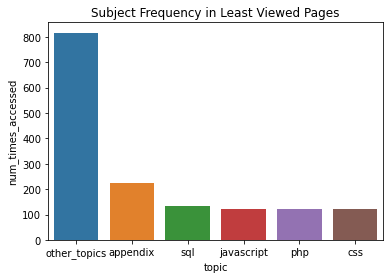

In [362]:
def accessed_once_series(the_df):
    df = pd.Series((the_df.path.value_counts()==1).index, name='paths')
    return df

def least_accessed(the_df):
    df = accessed_once_series(the_df)

    topics = ['sql', 'python', 'stats', 'fundamentals', 'regression', 'clustering', 'nlp',
              'appendix', 'timeseries', 'anomaly', 'classification', 'spark', 'storytelling', 'javascript', 'java',
             'css', 'spring', 'jquery', 'capstone', 'php', 'cli', 'git', 'laravel', 'angular', 'web-design', 
             'prework', 'apache', 'django', 'other_topics', 'pre-work']

    all_topics_reg_ex = '|'.join(topics)
    results = {'topic': topics, 
                  'num_times_accessed': [df[df.str.contains('sql')].shape[0],
                                    df[df.str.contains('python')].shape[0],
                                    df[df.str.contains('stats')].shape[0],
                                    df[df.str.contains('fundamentals')].shape[0],
                                    df[df.str.contains('regression')].shape[0],
                                    df[df.str.contains('clustering')].shape[0],
                                    df[df.str.contains('nlp')].shape[0],
                                    df[df.str.contains('appendix')].shape[0],
                                    df[df.str.contains('timeseries')].shape[0],
                                    df[df.str.contains('anomaly')].shape[0],
                                    df[df.str.contains('classification')].shape[0], 
                                    df[df.str.contains('spark')].shape[0],
                                    df[df.str.contains('storytelling')].shape[0],
                                    df[df.str.contains('javascript[-/]|javascript$')].shape[0],
                                    df[df.str.contains('java[-/]|_java|java$')].shape[0],
                                    df[df.str.contains('css')].shape[0],
                                    df[df.str.contains('spring')].shape[0],
                                    df[df.str.contains('jquery')].shape[0],
                                    df[df.str.contains('capstone')].shape[0],
                                    df[df.str.contains('php')].shape[0],
                                    df[df.str.contains('cli')].shape[0],
                                    df[df.str.contains('git')].shape[0],
                                    df[df.str.contains('laravel')].shape[0],
                                    df[df.str.contains('angular')].shape[0],
                                    df[df.str.contains('web-design')].shape[0],
                                    df[df.str.contains('prework')].shape[0],
                                    df[df.str.contains('apache')].shape[0],
                                    df[df.str.contains('django')].shape[0],
                                    df.shape[0]- df[df.str.contains(all_topics_reg_ex)].shape[0],
                                    df[df.str.contains('pre-work')].shape[0]]}

    results = pd.DataFrame(results).sort_values('num_times_accessed', ascending=False)
    return results

def other_topics(the_df):
    df = accessed_once_series(the_df)
    
    topics = ['sql', 'python', 'stats', 'fundamentals', 'regression', 'clustering', 'nlp',
              'appendix', 'timeseries', 'anomaly', 'classification', 'spark', 'storytelling', 'javascript', 'java',
             'css', 'spring', 'jquery', 'capstone', 'php', 'cli', 'git', 'laravel', 'angular', 'web-design', 'prework',
             'apache', 'django', 'other_topics', 'pre-work']

    all_topics_reg_ex = '|'.join(topics)
    
    df= df[~df.str.contains(all_topics_reg_ex, case=False)]
    
    return df

def without_file_pages(the_df):
    series = accessed_once_series(the_df)
    files = ['.html', '.json', '.aspx', '.jpg', '.jpeg', '.png', '.csv', '.mov', '.zip', 'slides', '.md', '.txt',
             '.ico']
    files = [file+ '$' if file != 'slides' else file for file in files]
    files = '|'.join(files)
    
    series = series[~series.str.contains(files)]
    
    return series


def create_least_viewed_viz(df):
    least= least_accessed(df)

    plt.title('Subject Frequency in Least Viewed Pages')
    sns.barplot(data= least[:6], x = 'topic', y = 'num_times_accessed')
    
    
create_least_viewed_viz(df)

<AxesSubplot:title={'center':'Subject Frequency in Least Viewed Pages'}, xlabel='topic', ylabel='num_times_accessed'>

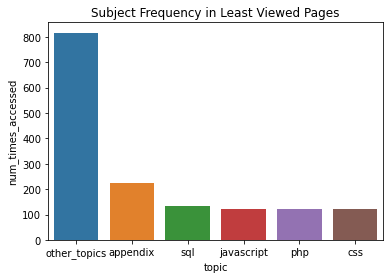

In [ ]:
plt.title('Subject Frequency in Least Viewed Pages')
sns.barplot(data= least[:6], x = 'topic', y = 'num_times_accessed'

In [305]:
df['path_freq'] = df.groupby('path')['path'].transform('count')


In [343]:
better =pd.DataFrame()
better['gtr_than_one']= df.groupby('path').path_freq.count() > 1
better

,gtr_than_one
path,
,True
%20https://github.com/RaulCPena,False
',False
",%20https://github.com/RaulCPena",False
.git,False
...,...
web-dev-day-two,True
where,False
working-with-time-series-data,True


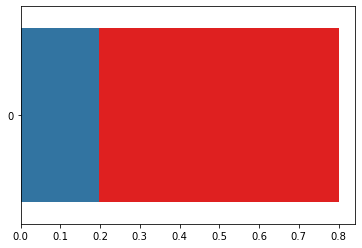

In [359]:
jesus = pd.DataFrame({'accessed_once': [better.gtr_than_one.sum()/better.gtr_than_one.size], 'more_than_once': [(better.gtr_than_one.size - better.gtr_than_one.sum())/better.gtr_than_one.size]})
#sns.barplot(data=jesus.accessed_once, color = 'red', orient='h')
#sns.barplot(data=jesus.more_than_once, orient='h')

plt.show()

In [272]:

sns.barplot(x=, data=least, palette="Blues_d")


IndentationError: expected an indented block (2311746690.py, line 3)

In [100]:
df= wrangle.wrangle_logs()
df.path = df.path.fillna(' ')

In [107]:
df.path = df.path.astype('string')
df[df.path.str.contains('capstone')]


,date,path,user_id,cohort_id,ip,name,slack,start_date,end_date,created_at,updated_at,program_id
137,2018-02-21 08:29:37,appendix/capstone-workbook,1.0,8.0,97.105.19.61,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,1.0
309,2018-03-09 08:31:20,appendix/capstone-workbook,1.0,8.0,97.105.19.61,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,1.0
343,2018-03-12 19:24:04,appendix/capstone-workbook,1.0,8.0,72.177.226.58,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,1.0
344,2018-03-12 19:26:34,appendix/capstone-workbook,1.0,8.0,72.177.226.58,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,1.0
464,2018-03-22 14:44:53,appendix/capstone-workbook,1.0,8.0,97.105.19.61,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
889824,2021-04-20 23:46:21,capstone,919.0,138.0,72.191.142.5,Neptune,#neptune,2021-03-15,2021-09-03,2021-03-15 19:57:09,2021-03-15 19:57:09,2.0
889825,2021-04-20 23:46:40,capstone/sw-project-planning,919.0,138.0,72.191.142.5,Neptune,#neptune,2021-03-15,2021-09-03,2021-03-15 19:57:09,2021-03-15 19:57:09,2.0
895715,2021-04-02 20:26:08,capstones/capstones,908.0,137.0,68.206.160.11,Florence,#florence,2021-03-15,2021-09-03,2021-03-15 18:18:20,2021-03-15 18:18:20,3.0
898595,2021-04-12 16:45:50,capstone,973.0,139.0,70.123.219.174,Oberon,#oberon,2021-04-12,2021-10-01,2021-04-12 18:07:21,2021-04-12 18:07:21,2.0


In [97]:
df.path.fillna('')

0                                           /
1                                     java-ii
2         java-ii/object-oriented-programming
3          slides/object_oriented_programming
4                      javascript-i/functions
                         ...                 
900224                                       
900225                                       
900226                                       
900227                                       
900228                                       
Name: path, Length: 900229, dtype: object

In [104]:
df.path.isna().sum()

0

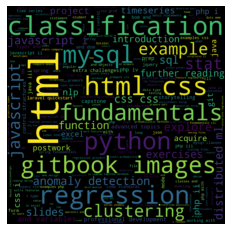

In [390]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator


def flatten(two_d_list):
    return [word for sub in two_d_list for word in sub]
    

word = [str(path).split('/') for path in df.path.unique()]
word = flatten(word)
word= [w.split('-') for w in word]
word = flatten(word)
word = [w.split('_') for w in word]
word = flatten(word)
word = [w.split('.') for w in word]
word = flatten(word)
    
text = " ".join(word)

stopwords = ['content', 'favicon', 'intro', 'appendix', 'ico', 'overview', 'md', 'to']
# Create and generate a word cloud image:

wordcloud = WordCloud(width=1200, height=1200,stopwords=stopwords).generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

